In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

# Top Score and Probability

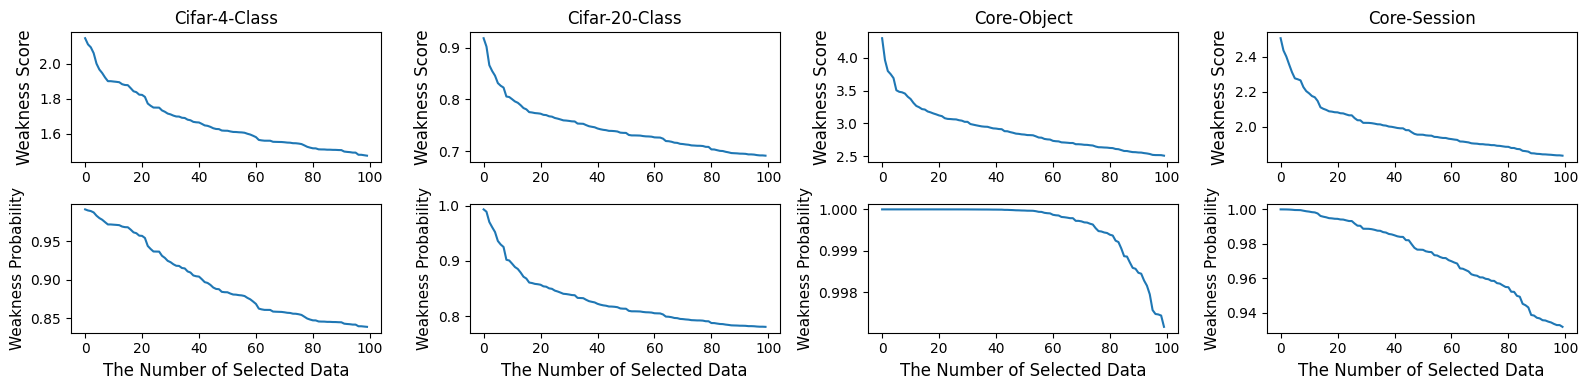

In [4]:
with open('../log/cifar_4class/top_score.pkl', 'rb') as f:
    cifar = pkl.load(f) 

with open('../log/cifar_20class/top_score.pkl', 'rb') as f:
    cifar_init = pkl.load(f) 

with open('../log/core_object/top_score.pkl', 'rb') as f:
    core_object = pkl.load(f) 

with open('../log/core_session/top_score.pkl', 'rb') as f:
    core_session = pkl.load(f) 


fig, ax = plt.subplots(2,4, figsize=(16,4))

n_data = np.arange(100)
ax = ax.flatten()

ax[0].plot(n_data, cifar['score'])
ax[4].plot(n_data, cifar['probab'])
ax[0].set_title('Cifar-4-Class')
ax[4].set_xlabel('The Number of Selected Data', fontsize=12)
ax[0].set_ylabel('Weakness Score', fontsize=12)
ax[4].set_ylabel('Weakness Probability', fontsize=11)

ax[1].plot(n_data, cifar_init['score'])
ax[5].plot(n_data, cifar_init['probab'])
ax[1].set_title('Cifar-20-Class')
ax[5].set_xlabel('The Number of Selected Data', fontsize=12)
ax[1].set_ylabel('Weakness Score', fontsize=12)
ax[5].set_ylabel('Weakness Probability', fontsize=11)

ax[2].plot(n_data, core_object['score'])
ax[6].plot(n_data, core_object['probab'])
ax[2].set_title('Core-Object')
ax[6].set_xlabel('The Number of Selected Data', fontsize=12)
ax[2].set_ylabel('Weakness Score', fontsize=12)
ax[6].set_ylabel('Weakness Probability', fontsize=11)

ax[3].plot(n_data, core_session['score'])
ax[7].plot(n_data, core_session['probab'])
ax[3].set_title('Core-Session')
ax[7].set_xlabel('The Number of Selected Data', fontsize=12)
ax[3].set_ylabel('Weakness Score', fontsize=12)
ax[7].set_ylabel('Weakness Probability', fontsize=11)

# fig.supxlabel('Acquisition Budget', fontsize=16)
# fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

# proxy vs baseline

## ae-w

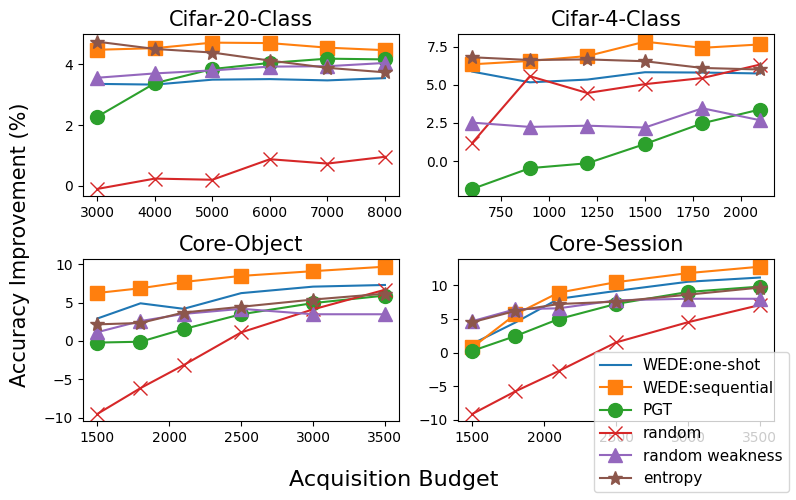

In [22]:
core_session= {
    'WEDE:one-shot':[1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
    'WEDE:sequential': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764], #[0.255, 3.355, 8.164, 10.718, 11.618, 12.536]-128 
    'PGT':  [0.264, 2.464, 4.982, 7.236, 9.009, 9.809],
    'random': [-9.109, -5.745, -2.745, 1.518, 4.518, 7.073], 
    # 'random': [3.718, 4.945, 5.636, 6.636, 7.373, 8.209], 
    'random weakness': [4.673, 6.445, 6.582, 7.773, 8.0, 8.0],
    'entropy': [4.518, 6.2, 7.218, 7.573, 8.609, 9.664], #[5.509, 6.591, 6.782, 8.236, 8.991, 9.709]-128
}
core_object= {
    'WEDE:one-shot' : [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'WEDE:sequential' : [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
    'PGT' : [-0.218, -0.109, 1.536, 3.473, 4.927, 5.909],
    'random' : [-9.518, -6.155, -3.155, 1.109, 4.109, 6.664],
    # 'random' : [2.582, 3.109, 3.527, 4.555, 5.345, 5.491], 
    'random weakness': [1.136, 2.582, 3.518, 4.182, 3.473, 3.473],
    'entropy': [2.155, 2.336, 3.7, 4.445, 5.391, 6.155] 
}
cifar_init = {
    'WEDE:one-shot' : [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'WEDE:sequential' : [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
    'PGT' : [2.276, 3.373, 3.838, 4.04, 4.179, 4.155],
    'random' : [-0.096, 0.243, 0.205, 0.879, 0.736, 0.958],
    'random weakness': [3.553, 3.695, 3.794, 3.918, 3.931, 4.038],
    'entropy': [4.736, 4.498, 4.38, 4.116, 3.878, 3.731]
}
cifar = {
    'WEDE:one-shot' : [5.86, 5.16, 5.34, 5.82, 5.8, 5.74],
    #[5.72, 5.7, 6.16, 5.84, 6.18, 5.2], #
    'WEDE:sequential' : [6.34, 6.56, 6.88, 7.82, 7.42, 7.64],
    #[6.32, 7.08, 7.26, 7.68, 7.62, 7.14], #
    'PGT' : [-1.82, -0.46, -0.14, 1.12, 2.48, 3.38],
    'random' : [1.2, 5.56, 4.46, 5.04, 5.44, 6.32], 
    # 'random' : [2.16, 3.84, 4.3, 4.34, 4.36, 4.36], 
    'random weakness': [2.52, 2.24, 2.32, 2.2, 3.46, 2.68],
    'entropy': [6.8, 6.62, 6.66, 6.54, 6.1, 6.0] #
}

marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    'PGT': 'o',
    'random': 'x',
    'random weakness': '^',
    'entropy': '*'
}

fig, ax = plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class',fontsize=15)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class',fontsize=15)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object',fontsize=15)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session',fontsize=15)

fig.legend(loc='lower right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=15)
fig.tight_layout()
fig.show()

## ae-c

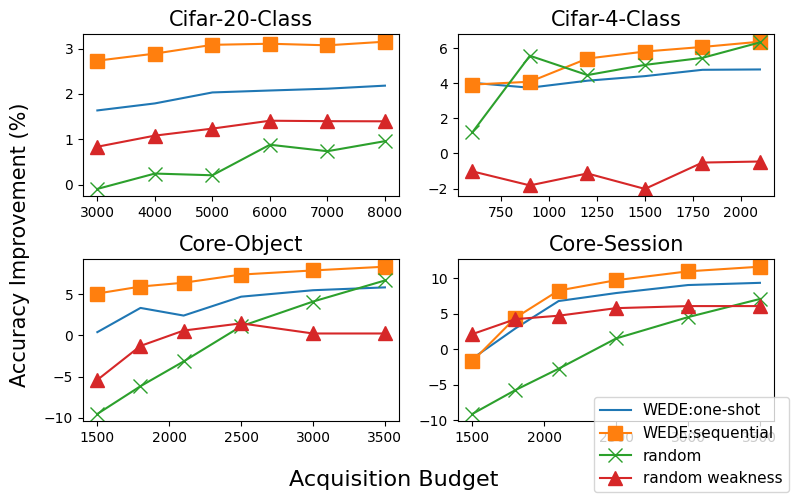

In [28]:
core_session= {
    'WEDE:one-shot': [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],# 0.5
    'WEDE:sequential': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],  #0.5 
    'random': [-9.109, -5.745, -2.745, 1.518, 4.518, 7.073], #[3.018, 4.082, 4.545, 5.418, 6.045, 6.673]
    'random weakness': [2.127, 4.236, 4.718, 5.782, 6.073, 6.073]
}

core_object= {
    'WEDE:one-shot' : [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],# 0.5 
    'WEDE:sequential': [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],#0.5 
    'random' :  [-9.518, -6.155, -3.155, 1.109, 4.109, 6.664], #[1.327, 1.818, 2.255, 3.182, 3.973, 4.218]
    'random weakness':[-5.391, -1.273, 0.591, 1.464, 0.236, 0.236]
}

cifar_init = {
    'WEDE:one-shot' : [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],
    'WEDE:sequential' :  [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
    'random' : [-0.096, 0.243, 0.205, 0.879, 0.736, 0.958], # 0.97, 1.088
    'random weakness': [0.835, 1.08, 1.235, 1.409, 1.399, 1.396]
} 

cifar = {
    'WEDE:one-shot' : [4.02, 3.74, 4.14, 4.4, 4.76, 4.78],
    #[4.12, 3.46, 4.66, 4.8, 5.12, 3.78], #
    'WEDE:sequential' :  [3.92, 4.08, 5.4, 5.8, 6.06, 6.36],
    #[3.48, 4.8, 5.5, 5.9, 5.98, 6.14], #
    'random' : [1.2, 5.56, 4.46, 5.04, 5.44, 6.32], 
    'random weakness': [-1.02, -1.82, -1.14, -2.02, -0.52, -0.46]
} 

marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    'random': 'x',
    'random weakness': '^',
}

fig, ax = plt.subplots(2,2, figsize=(8,5))
# fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class', fontsize=15)
# ax[0].set_title('Cifar-20-Class')
    

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class', fontsize=15)
# ax[1].set_title('Cifar-4-Class')
    

n_data = [1500, 1800, 2100, 2500, 3000, 3500]
for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object', fontsize=15)
# ax[2].set_title('Core-Object')
    

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session', fontsize=15)
# ax[3].set_title('Core-Session')
    

fig.legend(loc='lower right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=15)
# fig.supylabel('Accuracy Improvement (%)', fontsize=13)

fig.tight_layout()
fig.show()

## benchmark

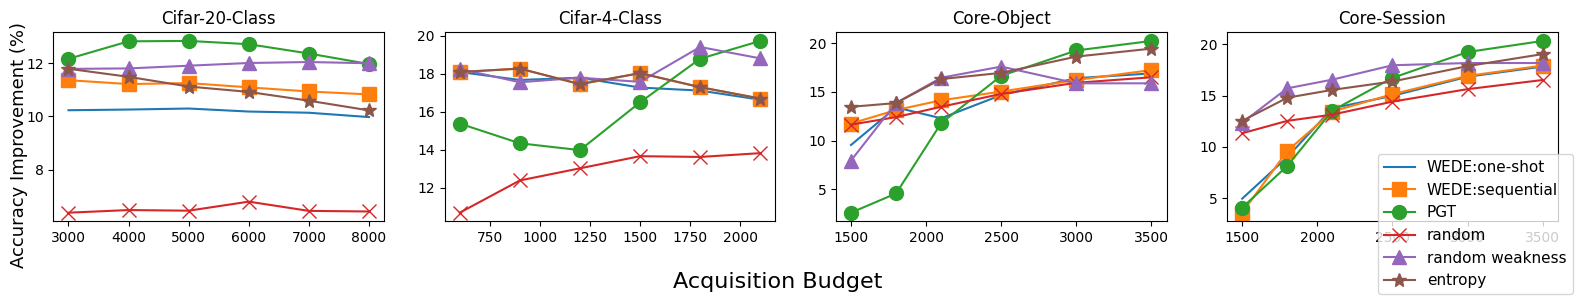

In [2]:
core_session= {
    'WEDE:one-shot':[4.955, 9.0, 13.764, 14.973, 16.836, 17.827], 
    'WEDE:sequential': [3.582, 9.6, 13.445, 15.136, 16.918, 17.927],
    'PGT':  [4.082, 8.145, 13.536, 16.727, 19.245, 20.327],
    'random': [11.327, 12.536, 13.145, 14.409, 15.627, 16.518],
    'random weakness': [12.364, 15.709, 16.555, 17.955, 18.173, 18.173],
    'entropy': [12.536, 14.791, 15.555, 16.373, 17.873, 19.045]
}
core_object= {
    'WEDE:one-shot' : [9.545, 13.409, 12.291, 14.673, 16.409, 16.9], 
    'WEDE:sequential' : [11.745, 13.136, 14.136, 15.036, 16.218, 17.245],  
    'PGT' : [2.591, 4.564, 11.782, 16.655, 19.255, 20.236],
    'random' : [11.636, 12.409, 13.473, 14.791, 15.936, 16.5],
    'random weakness': [7.945, 13.864, 16.455, 17.6, 15.882, 15.882],
    'entropy': [13.464, 13.855, 16.318, 16.955, 18.627, 19.445] 
}
cifar_init = {
    'WEDE:one-shot' : [10.235, 10.261, 10.299, 10.186, 10.141, 9.978],
    'WEDE:sequential' : [11.364, 11.218, 11.255, 11.095, 10.939, 10.829],
    'PGT' : [12.167, 12.824, 12.839, 12.716, 12.366, 11.971],
    'random' : [6.386, 6.485, 6.461, 6.801, 6.454, 6.431],
    'random weakness': [11.788, 11.806, 11.908, 12.01, 12.046, 12.0],
    'entropy': [11.793, 11.49, 11.126, 10.923, 10.593, 10.229]
}
cifar = {
    'WEDE:one-shot' : [18.1, 17.68, 17.8, 17.28, 17.12, 16.64], 
    'WEDE:sequential' : [18.1, 18.28, 17.46, 18.04, 17.3, 16.7], 
    'PGT' : [15.38, 14.34, 13.98, 16.5, 18.8, 19.74],
    'random' : [10.68, 12.38, 13.02, 13.66, 13.62, 13.82],
    'random weakness': [18.26, 17.56, 17.8, 17.58, 19.42, 18.82],
    'entropy': [18.1, 18.28, 17.46, 18.04, 17.3, 16.7]
}

marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    'PGT': 'o',
    'random': 'x',
    'random weakness': '^',
    'entropy': '*'
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

## random + ae

### ae-w

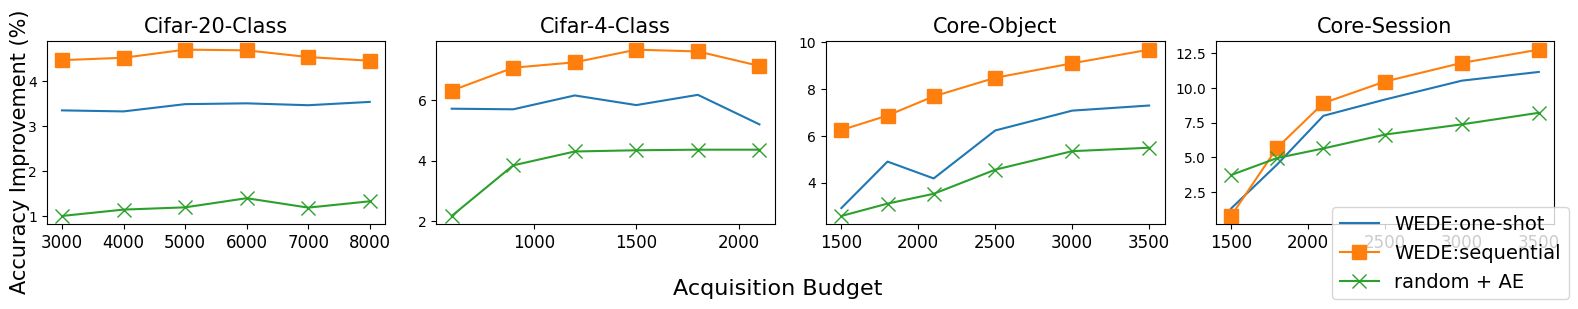

In [93]:

core_session= {
    'WEDE:one-shot':[1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
    'WEDE:sequential': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764],
    # 'random': [-9.109, -5.745, -2.745, 1.518, 4.518, 7.073], #
    'random + AE': [3.718, 4.945, 5.636, 6.636, 7.373, 8.209],
}
core_object= {
    'WEDE:one-shot' : [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'WEDE:sequential' : [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
    # 'random' : [-9.518, -6.155, -3.155, 1.109, 4.109, 6.664],#
    'random + AE': [2.582, 3.109, 3.527, 4.555, 5.345, 5.491],
}

cifar = {
    'WEDE:one-shot' : [5.72, 5.7, 6.16, 5.84, 6.18, 5.2], 
    'WEDE:sequential' : [6.32, 7.08, 7.26, 7.68, 7.62, 7.14], 
    # 'random' : [1.2, 5.56, 4.46, 5.04, 5.44, 6.32], #
    'random + AE': [2.16, 3.84, 4.3, 4.34, 4.36, 4.36]
}

cifar_init = {
    'WEDE:one-shot' : [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'WEDE:sequential' : [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
    # 'random' : [-0.096, 0.243, 0.205, 0.879, 0.736, 0.958],
    'random + AE': [0.997, 1.139, 1.189, 1.393, 1.183, 1.324]
}
marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    # 'random': 'x',
    'random + AE': 'x',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class', fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class', fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object', fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session', fontsize=15)
ax[3].tick_params(axis='x', labelsize=12)

fig.legend(loc='lower right', fontsize=14)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=15)
fig.tight_layout()
fig.show()

### ae-c

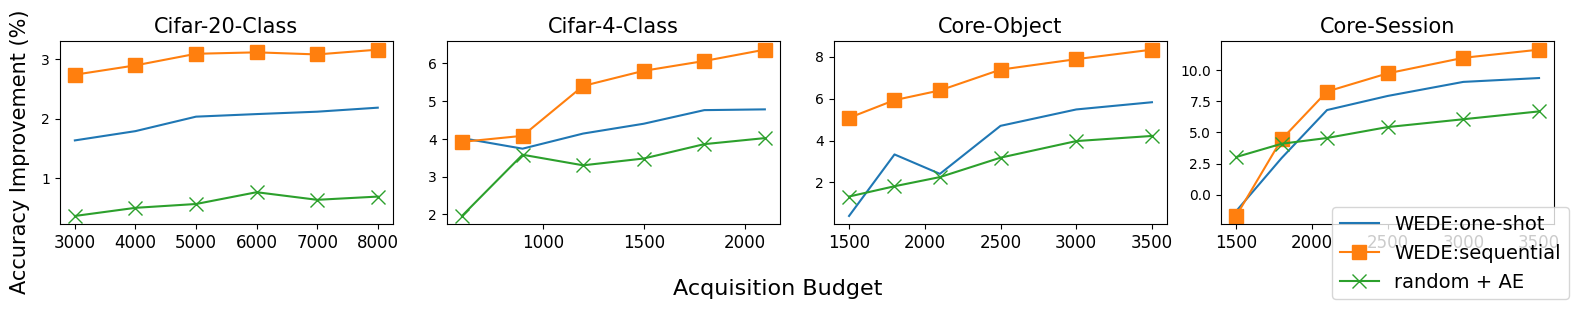

In [92]:
core_session= {
    'WEDE:one-shot': [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345], # 0.5
    'WEDE:sequential': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618], #0.5 
    # 'random': [-9.109, -5.745, -2.745, 1.518, 4.518, 7.073], #
    'random + AE': [3.018, 4.082, 4.545, 5.418, 6.045, 6.673]
}

core_object= {
    'WEDE:one-shot' : [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],# 0.5 
    'WEDE:sequential':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336], #0.5 
    # 'random' :  [-9.518, -6.155, -3.155, 1.109, 4.109, 6.664], #
    'random + AE':[1.327, 1.818, 2.255, 3.182, 3.973, 4.218]
}

cifar = {
    'WEDE:one-shot' : [4.02, 3.74, 4.14, 4.4, 4.76, 4.78],#  [2.16, 4.08, 3.82, 3.46, 3.58, 3.54]
    'WEDE:sequential' :  [3.92, 4.08, 5.4, 5.8, 6.06, 6.36], # [2.8, 3.64, 3.06, 3.72, 4.1, 4.04]
    # 'random' : [1.2, 5.56, 4.46, 5.04, 5.44, 6.32], #
    'random + AE': [1.96, 3.58, 3.3, 3.48, 3.86, 4.02]
}
cifar_init = {
    'WEDE:one-shot' : [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],
    'WEDE:sequential' :  [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
    # 'random' : [-0.096, 0.243, 0.205, 0.879, 0.736, 0.958], # 0.97, 1.088
    'random + AE': [0.373, 0.509, 0.573, 0.77, 0.643, 0.697]
}
marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    # 'random': 'x',
    'random + AE': 'x',
}
fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class', fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class', fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object', fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session', fontsize=15)
ax[3].tick_params(axis='x', labelsize=12)

fig.legend(loc='lower right', fontsize=14)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=15)
fig.tight_layout()
fig.show()

# Weakness Definition

## AE-W

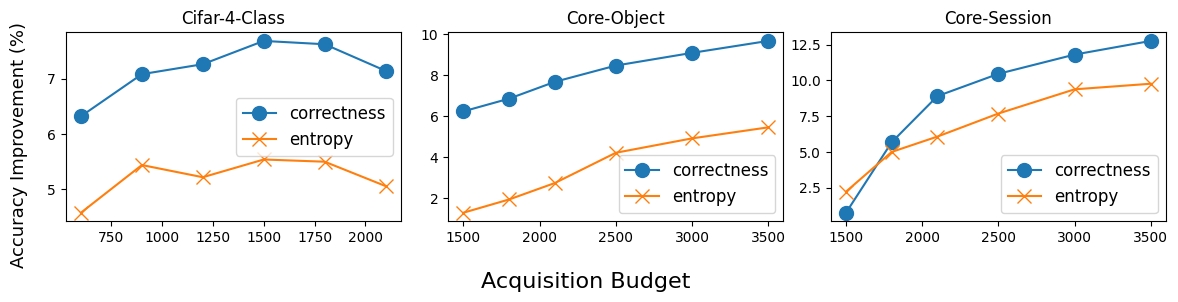

In [10]:

# seq (checked)
core_session= {
    'correctness': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764],
    'entropy': [2.236, 5.009, 6.082, 7.691, 9.382, 9.773]
}

core_object= {
    'correctness':  [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
    'entropy': [1.309, 1.955, 2.755, 4.227, 4.927, 5.464]
}

cifar = {
    'correctness': [6.32, 7.08, 7.26, 7.68, 7.62, 7.14],
    'entropy':  [4.58, 5.44, 5.22, 5.54, 5.5, 5.06]
}

# # one-shot
# core_session= {
#     'correctness':  [1.3, 4.482, 7.991, 9.164, 10.527, 11.155],
#     'entropy': [1.245, 3.391, 4.073, 5.136, 5.909, 7.1]
# }

# core_object= {
#     'correctness':  [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
#     'entropy': [0.264, 1.3, 1.864, 2.764, 2.964, 4.0]
# }

# cifar = {
#     'correctness': [5.72, 5.7, 6.16, 5.84, 6.18, 5.2], #
#     'entropy': [4.68, 5.92, 5.48, 5.06, 5.18, 5.14]
# }

marker = {
    'correctness':  'o',
    'entropy':  'x',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=12)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Object')
ax[1].legend(fontsize=12)

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=12)

# fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

## AE-C

In [ ]:
# # seq (checked)
# core_session= {
#     'U-WS': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],
#     'U-WSD': [0.636, 4.336, 8.991, 9.809, 10.873, 11.473]
# }

# core_object= {
#     'U-WS':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],
#     'U-WSD':  [5.4, 6.064, 6.555, 6.9, 8.136, 8.164]
# }

# cifar = {
#     'U-WS': [3.48, 4.8, 5.5, 5.9, 5.98, 6.14], 
#     'U-WSD': [3.86, 4.7, 5.56, 5.58, 6.0, 6.4] 
# }

# # one-shot
# core_session= {
#     'U-WS':  [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
#     'U-WSD': [-0.591, 2.345, 6.064, 8.127, 8.764, 8.873]
# }

# core_object= {
#     'U-WS':  [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
#     'U-WSD': 
# }

cifar = {
    'U-WS':  [4.12, 3.46, 4.66, 4.8, 5.12, 3.78],#
    'U-WSD': [2.16, 4.08, 3.82, 3.46, 3.58, 3.54]
}

marker = {
    'U-WS':  'o',
    'U-WSD':  'x',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=10)

for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Object')
ax[1].legend(fontsize=10)

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=10)

# fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

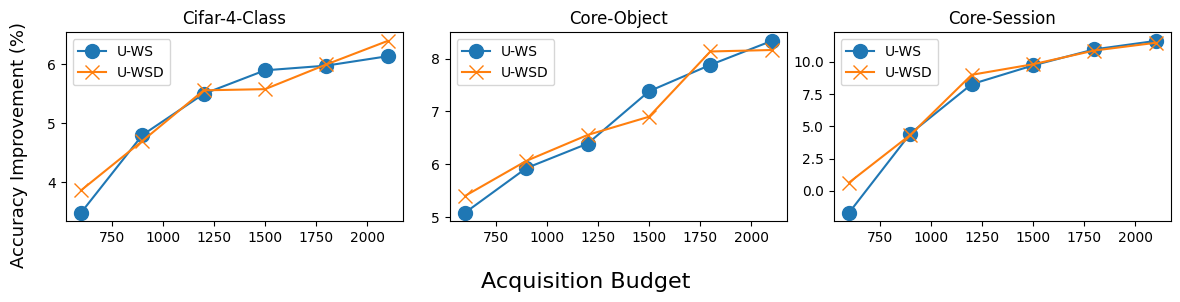

In [ ]:

# seq (checked)
core_session= {
    'correctness': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],
    'entropy': [0.636, 4.336, 8.991, 9.809, 10.873, 11.473]
}

core_object= {
    'correctness':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],
    'entropy':  [5.4, 6.064, 6.555, 6.9, 8.136, 8.164]
}

cifar = {
    'correctness': [3.48, 4.8, 5.5, 5.9, 5.98, 6.14], 
    'entropy': [3.86, 4.7, 5.56, 5.58, 6.0, 6.4] 
}

# # one-shot
# core_session= {
#     'correctness':  [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
#     'entropy': [-0.591, 2.345, 6.064, 8.127, 8.764, 8.873]
# }

# core_object= {
#     'correctness':  [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
#     'entropy': [0.482, 1.636, 2.964, 4.627, 5.627, 5.855]
# }

# cifar = {
#     'correctness':  [4.12, 3.46, 4.66, 4.8, 5.12, 3.78],#
#     'entropy':[3.32, 3.82, 5.0, 4.74, 5.2, 3.94] #
# }

marker = {
    'correctness':  'o',
    'entropy':  'x',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=10)

for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Object')
ax[1].legend(fontsize=10)

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=10)

# fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

# Utility Threshold

## U-WSd

### acc

#### ae-w

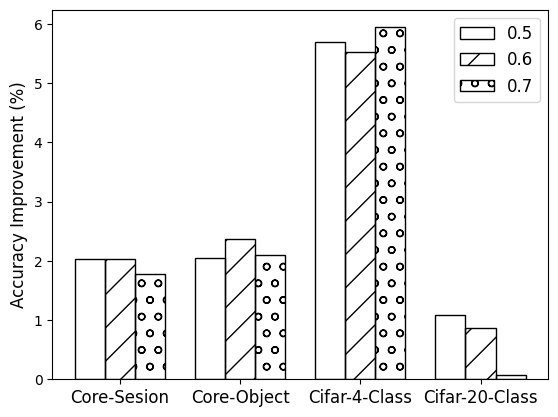

In [6]:
core_session ={
    '0.5': 2.027,
    '0.6': 2.027,
    '0.7': 1.782
}  
core_object ={
    '0.5': 2.045,
    '0.6': 2.373,
    '0.7': 2.1
}   
cifar ={
    '0.5': 5.7,
    '0.6': 5.52,
    '0.7': 5.94,
}
cifar_init ={
    '0.5': 1.082,
    '0.6':  0.869,
    '0.7':  0.079
} 
pattern = {
    '0.5': '',
    '0.6': '/',
    '0.7': 'o'
}
x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key], cifar_init[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Accuracy Improvement (%)', fontsize=12)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class', 'Cifar-20-Class'], fontsize=12)
plt.legend(fontsize=12)

plt.show()

#### ae-c

In [ ]:
core_session ={
    '0.5': 8.182,
    '0.6': 7.945,
    '0.7': 7.564,
}   
core_object ={
    '0.5': 4.173,
    '0.6':  4.082 ,
    '0.7':  4.282
}  
cifar ={
    '0.5': 4.36,
    '0.6': 4.26,
    '0.7': 4.52,
}


pattern = {
    '0.5': '',
    '0.6': '/',
    '0.7': 'o'
}
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Accuracy Improvement (%)', fontsize=12)
plt.xticks(x, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class'], fontsize=12)
plt.legend(fontsize=12)

plt.show()

### dstr

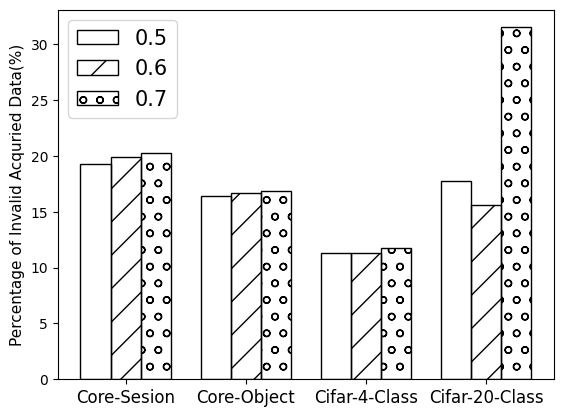

In [7]:
core_session ={
    '0.5': 19.239,
    '0.6': 19.945,
    '0.7': 20.289,
}    
core_object ={
    '0.5': 16.434,
    '0.6': 16.657,
    '0.7': 16.872,
}     
cifar ={
    '0.5': 11.283 ,
    '0.6': 11.297,
    '0.7': 11.785,
}   
cifar_init ={
    '0.5': 17.787,
    '0.6': 15.639,
    '0.7': 31.526
}    
pattern = {
    '0.5': '',
    '0.6': '/',
    '0.7': 'o'
}
x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key], cifar_init[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Percentage of Invalid Acquried Data(%)', fontsize=11)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class', 'Cifar-20-Class'], fontsize=12)
plt.legend(fontsize=15)
# plt.ylim(0, 100)

plt.show()

## U-WS

### dstr

In [ ]:
core_session ={
    '0.5': 45.985,
    '0.6': 55.973,
    '0.7': 67.757,
}
core_object ={
    '0.5': 39.469,
    '0.6': 45.208,
    '0.7': 54.921,
}
cifar ={
    '0.5': 60.015,
    '0.6': 64.857,
    '0.7': 69.682,
}
pattern = {
    '0.5': '',
    '0.6': '/',
    '0.7': 'o'
}
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Percentage of Misclassifications (%)', fontsize=12)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class'], fontsize=12)
plt.legend(fontsize=15)

plt.show()

### acc

In [ ]:
core_session ={
    '0.5': 9.636,
    '0.6': 9.982,
    '0.7': 9.691,
}
core_object ={
    '0.5': 5.255,
    '0.6': 5.591,
    '0.7': 5.164,
}
cifar ={
    '0.5': 1.94,
    '0.6': 2.54,
    '0.7': 1.4,
}
pattern = {
    '0.5': '',
    '0.6': '/',
    '0.7': 'o'
}
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Accuracy Improvement (%)', fontsize=12)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class'], fontsize=12)
plt.legend(fontsize=12)

plt.show()

# Ensemble

## non-ae

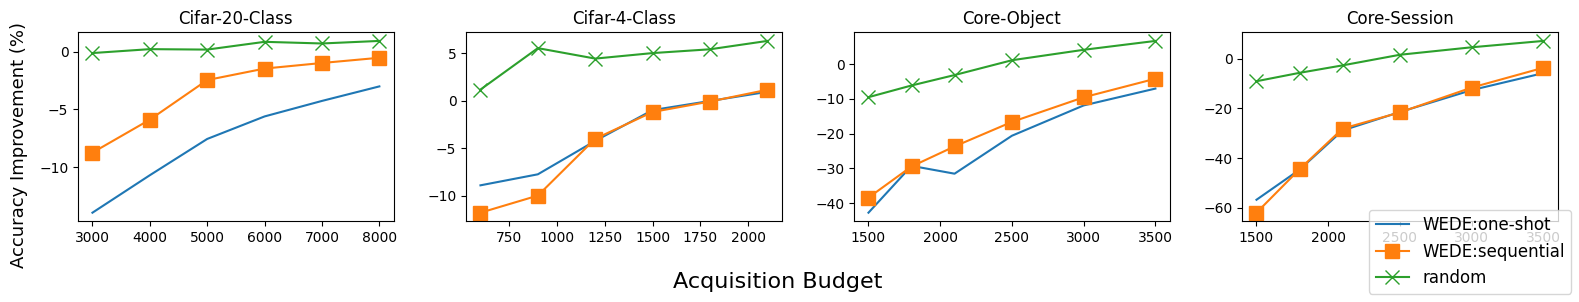

In [28]:
core_session= {
    'WEDE:one-shot' :[-56.709, -44.636, -28.882, -21.473, -12.673, -5.845],
    'WEDE:sequential' : [-61.9, -44.464, -28.145, -21.618, -11.664, -3.7],
    'random' : [-9.109, -5.745, -2.745, 1.518, 4.518, 7.073]
}
core_object= {
    'WEDE:one-shot' : [-42.745, -29.273, -31.527, -20.609, -11.891, -7.045],
    'WEDE:sequential' : [-38.418, -29.455, -23.682, -16.636, -9.555, -4.209],
    'random' : [-9.518, -6.155, -3.155, 1.109, 4.109, 6.664]
}

cifar = {
    'WEDE:one-shot' : [-8.88, -7.72, -4.2, -0.96, 0.0, 0.96],
    'WEDE:sequential' :[-11.76, -9.96, -3.98, -1.16, -0.06, 1.18], #
    'random' : [1.2, 5.56, 4.46, 5.04, 5.44, 6.32] #
}
cifar_init = {
    'WEDE:one-shot' : [-13.97, -10.714, -7.561, -5.604, -4.256, -2.994],
    'WEDE:sequential' : [-8.75, -5.885, -2.442, -1.444, -0.96, -0.505],
    'random' : [-0.096, 0.243, 0.205, 0.879, 0.736, 0.958],
}
marker = {
    'WEDE:one-shot': '',
    'WEDE:sequential': 's',
    'random': 'x',
    # 'random weakness': '^',
    # 'entropy': '|'
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=12)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

## AE vs Average

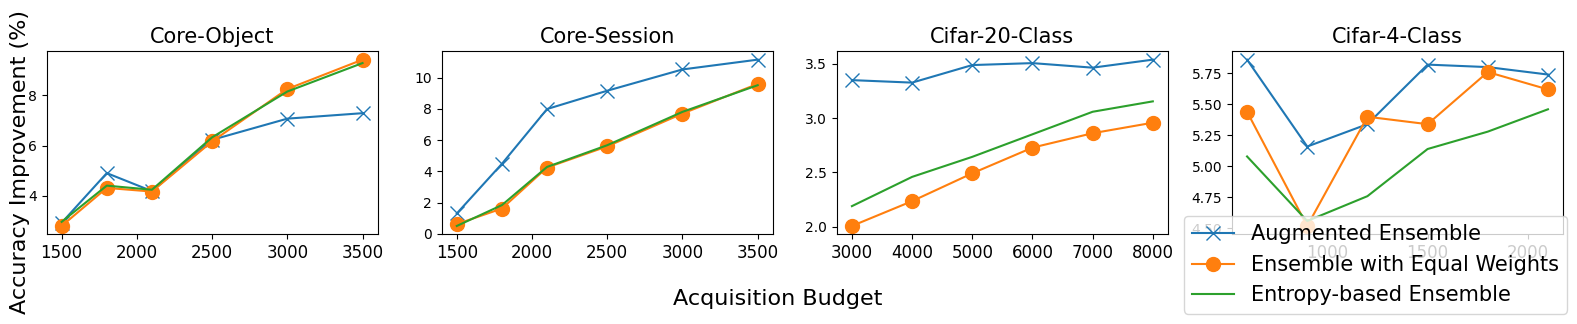

In [20]:
# one-shot (checked)
core_session= {
    'Augmented Ensemble': [1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
    'Ensemble with Equal Weights': [0.618, 1.618, 4.245, 5.6, 7.7, 9.6],
    'Entropy-based Ensemble': [0.5, 1.836, 4.282, 5.673, 7.809, 9.518],
}

core_object= {
    'Augmented Ensemble': [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'Ensemble with Equal Weights': [2.791, 4.309, 4.164, 6.164, 8.255, 9.427],
    'Entropy-based Ensemble': [2.955, 4.4, 4.236, 6.327, 8.155, 9.291],
}

cifar = {
    'Augmented Ensemble': [5.86, 5.16, 5.34, 5.82, 5.8, 5.74],# 
    'Ensemble with Equal Weights': [5.44, 4.52, 5.4, 5.34, 5.76, 5.62],
    'Entropy-based Ensemble': [5.08, 4.56, 4.76, 5.14, 5.28, 5.46]
}

cifar_init = {
    'Augmented Ensemble':  [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'Ensemble with Equal Weights':[2.005, 2.234, 2.491, 2.728, 2.861, 2.958],
    'Entropy-based Ensemble': [2.188, 2.458, 2.643, 2.851, 3.059, 3.155]
}

# # seq
# core_session= {
#     'Augmented Ensemble': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764], 
#     'Ensemble with Equal Weights': [0.055, 2.464, 4.882, 5.991, 7.982, 10.1],
#     'Entropy-based Ensemble': [0.191, 2.618, 4.945, 5.845, 8.227, 9.964]
# }

# core_object= {
#     'Augmented Ensemble': [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
#     'Ensemble with Equal Weights': [3.809, 4.573, 5.8, 7.009, 8.591, 9.7],
# 'Entropy-based Ensemble': [3.855, 5.064, 5.973, 6.845, 8.636, 9.645],
# }

# cifar = {
#     'Augmented Ensemble':[6.34, 6.56, 6.88, 7.82, 7.42, 7.64],#
#     'Ensemble with Equal Weights': [4.42, 5.08, 5.8, 6.04, 6.12, 6.04], 
#     'Entropy-based Ensemble': [4.62, 4.62, 5.46, 6.0, 5.22, 5.68]
# }

# cifar_init = {
#     'Augmented Ensemble':[4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
#     'Ensemble with Equal Weights': [3.121, 3.358, 3.841, 3.808, 3.824, 3.74],
# 'Entropy-based Ensemble':[3.07, 3.435, 3.946, 4.065, 4.008, 3.958]
# }

marker = {
    'Augmented Ensemble': 'x',
    'Ensemble with Equal Weights': 'o',
    'Entropy-based Ensemble': '',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [1500, 1800, 2100, 2500, 3000, 3500]
for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object', fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Session', fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Cifar-20-Class', fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Cifar-4-Class', fontsize=15)
ax[3].tick_params(axis='x', labelsize=12)

fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=16)
fig.tight_layout()
fig.show()

## AE vs WTA

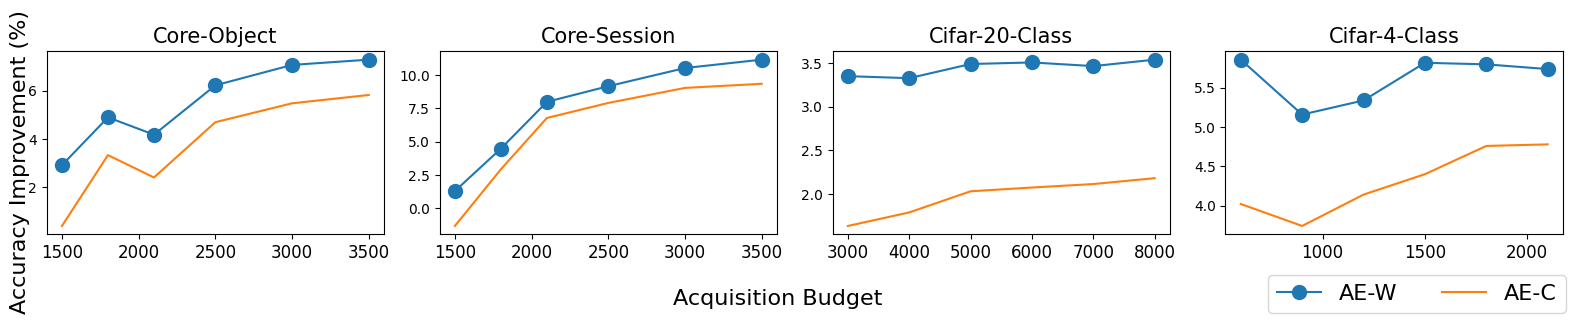

In [16]:
# one-shot
core_session= {
    'AE-W': [1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
    'AE-C': [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
}

core_object= {
    'AE-W':  [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'AE-C': [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
}

cifar = {
    'AE-W':[5.86, 5.16, 5.34, 5.82, 5.8, 5.74],
    'AE-C':[4.02, 3.74, 4.14, 4.4, 4.76, 4.78], #
}
cifar_init = {
    'AE-W': [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'AE-C':  [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],#
}

# # seq
# core_session= {
#     'AE-W': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764], 
#     'AE-C':  [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618]
#     }

# core_object= {
#     'AE-W': [6.245, 6.864, 7.682, 8.473, 9.091, 9.673], 
#     'AE-C':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336]
# }

# cifar = {
#     'AE-W': [6.34, 6.56, 6.88, 7.82, 7.42, 7.64],#
#     'AE-C': [3.92, 4.08, 5.4, 5.8, 6.06, 6.36],
# }
# cifar_init = {
#     'AE-W': [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
#     'AE-C': [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
# }

marker = {
    'AE-W': 'o',
    'AE-C': ''
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10)
ax[0].set_title('Core-Object', fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Session', fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Cifar-20-Class', fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[3].set_title('Cifar-4-Class', fontsize=15)
ax[3].tick_params(axis='x', labelsize=12)

fig.legend(loc='lower right', fontsize=16, ncol=2)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=16)
fig.tight_layout()
fig.show()

## WTA

### acc

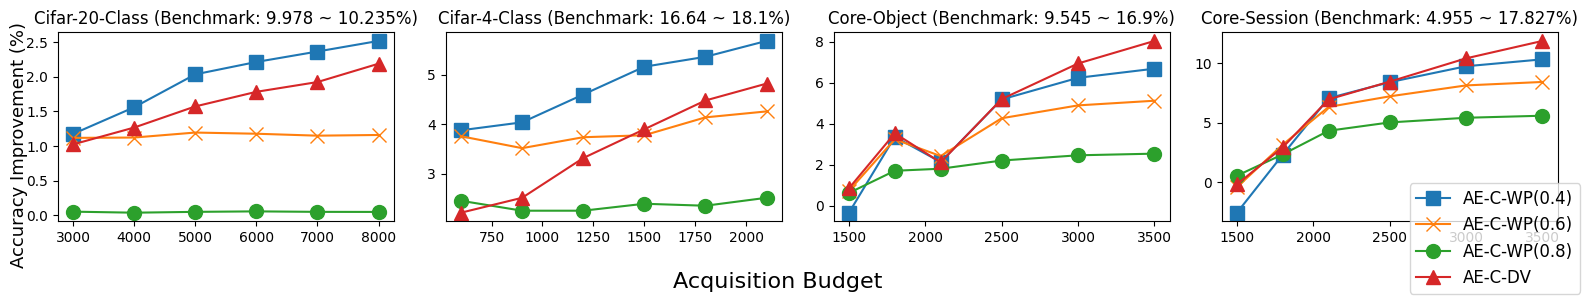

In [20]:
# one-shot (checked)
core_session= {
    'AE-C-WP(0.4)': [-2.573, 2.3, 7.045, 8.391, 9.727, 10.309],
    'AE-C-WP(0.6)': [-0.427, 3.145, 6.309, 7.2, 8.118, 8.409],
    'AE-C-WP(0.8)': [0.536, 2.327, 4.309, 5.009, 5.4, 5.573],
    'AE-C-DV':[-0.191, 2.918, 6.945, 8.436, 10.391, 11.855]
}

core_object= {
    'AE-C-WP(0.4)': [-0.336, 3.364, 2.136, 5.191, 6.245, 6.691],
    'AE-C-WP(0.6)': [0.736, 3.245, 2.427, 4.273, 4.9, 5.127],
    'AE-C-WP(0.8)': [0.627, 1.709, 1.809, 2.209, 2.464, 2.545],
    'AE-C-DV': [0.855, 3.536, 2.118, 5.209, 6.945, 8.045]
}

cifar_init = {
    'AE-C-WP(0.4)': [1.176, 1.561, 2.036, 2.215, 2.366, 2.519],
    'AE-C-WP(0.6)':  [1.119, 1.124, 1.196, 1.179, 1.151, 1.161], #
    'AE-C-WP(0.8)':[0.054, 0.039, 0.051, 0.058, 0.051, 0.05], #
    'AE-C-DV': [1.025, 1.268, 1.573, 1.784, 1.925, 2.19]
}

cifar = {
    'AE-C-WP(0.4)': [3.88, 4.04, 4.6, 5.16, 5.36, 5.68], #
    'AE-C-WP(0.6)': [3.76, 3.52, 3.74, 3.78, 4.14, 4.26], #
    'AE-C-WP(0.8)': [2.46, 2.26, 2.26, 2.4, 2.36, 2.52], #
    'AE-C-DV': [2.22, 2.52, 3.32, 3.9, 4.48, 4.82], #
}

# # seq
# core_session= {
#     'AE-C-WP(0.4)': [-3.264, 3.873, 8.136, 9.8, 11.391, 12.245],
#     'AE-C-WP(0.6)': [-0.755, 4.8, 8.027, 9.245, 10.182, 10.536],
#     'AE-C-WP(0.8)': [0.418, 3.564, 5.473, 5.682, 6.564, 5.918],
#     'AE-C-DV':  [-40.991, -32.909, -22.227, -14.155, -5.791, -1.591]
# }

# core_object= {
#     'AE-C-WP(0.4)': [4.318, 5.6, 6.164, 7.491, 8.209, 8.845],
#     'AE-C-WP(0.6)': [5.327, 6.118, 6.364, 7.073, 7.436, 7.755],
#     'AE-C-WP(0.8)': [4.118, 4.382, 4.627, 4.809, 5.036, 4.764],
#     'AE-C-DV': [-34.645, -25.8, -20.127, -13.745, -6.791, -2.345]
# }

# cifar = {
#     'AE-C-WP(0.4)': [2.5, 3.46, 4.98, 6.1, 6.42, 6.64],
#     'AE-C-WP(0.6)': [4.46, 4.82, 4.94, 5.6, 5.24, 5.5],
#     'AE-C-WP(0.8)': [3.2, 3.28, 3.0, 2.88, 3.16, 3.22],
#     'AE-C-DV': [-5.1, -5.8, -1.42, 0.62, 1.2, 2.46],
# }

# cifar_init = {
#     'AE-C-WP(0.4)': [2.485, 2.695, 3.266, 3.385, 3.384, 3.495], 
#     'AE-C-WP(0.6)': [2.316, 2.338, 2.49, 2.543, 2.421, 2.466],
#     'AE-C-WP(0.8)': [1.118, 1.196, 1.21, 1.276, 1.158, 1.201],
#     'AE-C-DV': [0.525, 0.336, 1.475, 1.228, 1.299, 1.204]
# }

marker = {
    'AE-C-WP(0.4)': 's',
    'AE-C-WP(0.8)': 'o',
    'AE-C-WP(0.6)': 'x',
    'AE-C-DV': '^',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class (Benchmark: 9.978 ~ 10.235%)')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class (Benchmark: 16.64 ~ 18.1%)')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]
for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object (Benchmark: 9.545 ~ 16.9%)')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session (Benchmark: 4.955 ~ 17.827%)')

fig.legend(loc='lower right', fontsize=12)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

### error in test data

#### ae-c-wp v.s. ae-c-dv

##### weakness

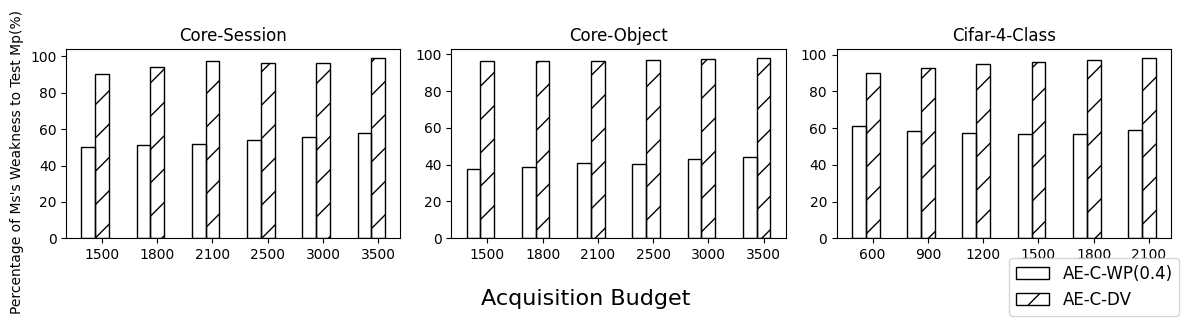

In [26]:
# # one-shot
# core_session= {
#     'AE-C-WP(0.4)': np.repeat([50.372], 6), 
#     'AE-C-DV': [39.106, 44.004, 48.557, 53.328, 58.895, 64.451]
# }

# core_object= {
#     'AE-C-WP(0.4)': np.repeat([38.803], 6),
#     'AE-C-DV': [28.912, 32.61, 36.653, 42.149, 48.393, 53.886]
# }

# cifar = {
#     'AE-C-WP(0.4)': np.repeat([59.648], 6), 
#     'AE-C-DV': [16.72, 22.806, 30.713, 37.364, 42.471, 48.148]
# }
# cifar_init = {
#     'AE-C-WP(0.4)': np.repeat([63.401], 6), 
#     'AE-C-DV': [18.716, 24.119, 29.383, 34.415, 39.227, 43.962]
# }
# seq
core_session= {
    'AE-C-WP(0.4)':[50.34, 51.034, 51.748, 53.882, 55.836, 58.056],
    'AE-C-DV': [90.422, 94.361, 97.277, 96.466, 96.128, 98.911]
}

core_object= {
    'AE-C-WP(0.4)': [37.531, 38.619, 41.036, 40.333, 43.091, 44.223], 
    'AE-C-DV': [96.534, 96.197, 96.188, 96.874, 97.61, 97.759]
} 

cifar = {
    'AE-C-WP(0.4)': [61.033, 58.399, 57.453, 56.63, 56.819, 58.733],
    'AE-C-DV': [89.912, 92.439, 94.668, 96.122, 97.047, 97.954]
}

cifar_init = {
    'AE-C-WP(0.4)':[55.331, 52.664, 52.196, 52.007, 53.018, 52.63],
    'AE-C-DV': [74.035, 81.909, 84.678, 90.358, 91.48, 93.944]
}

labels = ['AE-C-WP(0.4)', 'AE-C-DV']
pattern = {'AE-C-WP(0.4)': '', 'AE-C-DV': '/'}

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(6)

# n_data = [3000, 4000, 5000, 6000, 7000, 8000]
# multiplier = 0
# for key, values in cifar_init.items():
#     offset = width * multiplier
#     rects = ax[0].bar(x + offset, values, width, fill=False, hatch=pattern[key])
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0].set_xticks(x + width, n_data)
# # ax[0].legend(loc='upper left', ncols=3)
# # ax[0].set_ylim(0, 100)
# ax[0].set_title('Cifar-20-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
# ax[2].set_ylim(0, 100)
ax[0].set_title('Core-Session')
multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data)
# ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

n_data = [600, 900, 1200, 1500, 1800, 2100]
multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key], label=key)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_title('Cifar-4-Class')

fig.legend(loc='lower right', fontsize=12)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Ms\'s Weakness to Test Mp(%)', fontsize=10)
fig.tight_layout()
fig.show()

##### non-weakness

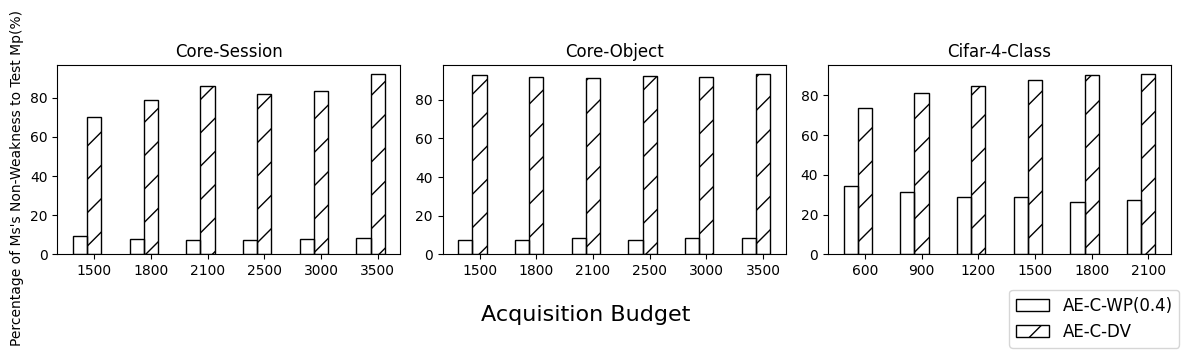

In [27]:
# # one-shot
# core_session= {
#     'AE-C-WP(0.4)': np.repeat([10.791], 6),
#     'AE-C-DV': [5.721, 7.711, 9.825, 12.955, 17.143, 21.688]
# }
# core_object= {
#     'AE-C-WP(0.4)': np.repeat([15.055] , 6),
#     'AE-C-DV': [9.373, 11.52, 13.792, 17.469, 21.854, 26.249]
# }
# cifar = {
#     'AE-C-WP(0.4)': np.repeat([33.65], 6), 
#     'AE-C-DV': [6.365, 9.366, 12.767, 17.068, 21.57, 26.061]
# }
# cifar_init = {
#     'AE-C-WP(0.4)': np.repeat([31.585], 6), 
#     'AE-C-DV': [6.231, 8.521, 10.955, 13.573, 16.115, 18.676]
# }

# seq
core_session= {
    'AE-C-WP(0.4)':[9.384, 7.914, 7.197, 7.268, 7.797, 8.167],
    'AE-C-DV': [70.034, 78.941, 85.885, 81.934, 83.276, 92.056]
}
core_object= {
    'AE-C-WP(0.4)': [7.382, 7.41, 8.208, 7.158, 8.648, 8.374], 
    'AE-C-DV': [92.833, 92.059, 91.24, 92.327, 91.884, 93.218]
} 

cifar = {
    'AE-C-WP(0.4)': [34.273, 31.182, 28.851, 28.722, 26.225, 27.334],
    'AE-C-DV': [73.38, 81.079, 84.742, 87.926, 90.097, 90.533]
}
cifar_init = {
    'AE-C-WP(0.4)': [24.885, 23.374, 22.566, 22.102, 22.527, 21.76],
    'AE-C-DV': [44.557, 56.05, 61.026, 71.852, 73.855, 78.894]
}

labels = ['AE-C-WP(0.4)', 'AE-C-DV']
pattern = {'AE-C-WP(0.4)': '', 'AE-C-DV': '/'}
fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(6)

# n_data = [3000, 4000, 5000, 6000, 7000, 8000]
# multiplier = 0
# for key, values in cifar_init.items():
#     offset = width * multiplier
#     rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0].set_xticks(x + width, n_data)
# # ax[0].legend(loc='upper left', ncols=3)
# # ax[0].set_ylim(0, 100)
# ax[0].set_title('Cifar-20-Class')
n_data = [1500, 1800, 2100, 2500, 3000, 3500]

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
# ax[2].set_ylim(0, 100)
ax[0].set_title('Core-Session')
multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data)
# ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

n_data = [600, 900, 1200, 1500, 1800, 2100]
multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key], label=key)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_title('Cifar-4-Class')

fig.legend(loc='lower right', fontsize=12)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Ms\'s Non-Weakness to Test Mp(%)', fontsize=10)
fig.tight_layout()
fig.show()

#### ae-c-wp

##### one-shot

In [ ]:
# core_session ={
#     '0.4': 62.363,
#     '0.6': ,
#     '0.8': 77.246
# }
# core_object ={
#     '0.4': 47.117,
#     '0.6': ,
#     '0.8': 
# }
# cifar ={
#     '0.4': 52.856,
#     '0.6': ,
#     '0.8': 
# }
# x = np.arange(3)  # the label locations
# width = 0.25  # the width of the bars
# multiplier = 0

# # fig, ax = plt.subplots(layout='constrained')
# pattern ={
#     'SVM': '', 
#     'Logistic Regression': '/'
# }
# for key, value in core_session.items():
#     offset = width * multiplier
#     rects = plt.bar(x + offset, [cifar[key], core_object[key], core_session[key]], width, label=key, fill=False, hatch=pattern[key])
#     # plt.bar_label(rects, padding=3)
#     multiplier += 1

# plt.ylabel('Weakness Detection Accuracy (%)', fontsize=15)
# plt.xticks(x+0.1, ['Cifar-4-Class', 'Core-Object', 'Core-Session'], fontsize=15)
# plt.legend(fontsize=15)
# plt.ylim(0, 100)

# plt.show()


##### seq

In [ ]:
core_session= {
    '0.4':[65.369, 69.447, 71.7, 72.247, 71.533, 71.413],
    '0.6': [76.135, 77.625, 79.638, 80.367, 80.402, 79.429],
    '0.8': [86.427, 87.966, 87.209, 87.556, 85.861, 88.486]
}

core_object= {
    '0.4': [65.087, 65.558, 64.083, 66.991, 63.589, 64.857],
    '0.6':[76.968, 77.848, 76.341, 78.236, 74.192, 75.646],
    '0.8': [86.414, 86.124, 83.512, 86.38, 83.202, 83.455]
} 

cifar = {
    '0.4': [52.458, 53.644, 55.752, 56.326, 58.373, 59.059],
    # '0.6': , 
    # '0.8': 
}

labels = ['SVM', 'Logistic Regression']
pattern = {'Logistic Regression': '', 'SVM': '/'}
fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()

width = 0.25  # the width of the bars
x = np.arange(6)

n_data = [600, 900, 1200, 1500, 1800, 2100]

multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
# ax[0].legend(loc='upper left', ncols=3)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-4-Class')

multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data)
ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=11)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Weakness Detection Accuracy (%)', fontsize=12)
fig.tight_layout()
fig.show()

### Overfit

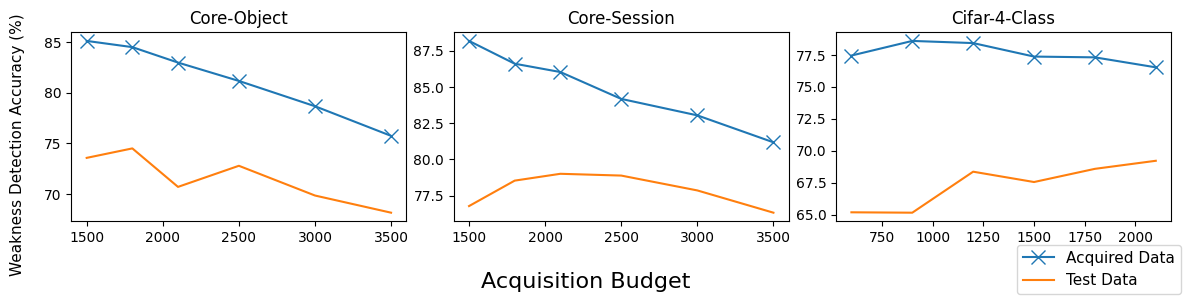

In [21]:
# checked
core_session= {
    'Acquired Data': [88.192, 86.617, 86.042, 84.185, 83.047, 81.185],
    'Test Data': [76.78, 78.538, 79.01, 78.887, 77.86, 76.322],
}

core_object= {
    'Acquired Data':[85.152, 84.537, 83.009, 81.192, 78.688, 75.755],
    'Test Data':[73.577, 74.514, 70.705, 72.793, 69.85, 68.151],
}

cifar = {
    'Acquired Data': [77.459, 78.603, 78.434, 77.379, 77.318, 76.538],
    'Test Data': [65.201, 65.171, 68.377, 67.569, 68.6, 69.23],
}

cifar_init = {
    'Acquired Data': [62.214, 63.775, 63.873, 63.403, 62.29, 61.355], 
    'Test Data': [62.971, 63.573, 64.211, 64.228, 64.171, 63.609], 
}
marker = {
    'Acquired Data': 'x',
    'Test Data': ''
}

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()

# n_data = [3000, 4000, 5000, 6000, 7000, 8000]

# for key,val in cifar_init.items():
#     ax[0].plot(n_data, val, marker = marker[key], markersize=10)
# ax[0].set_title('Cifar-20-Class')


n_data = [1500, 1800, 2100, 2500, 3000, 3500]
for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object')

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Session')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Cifar-4-Class')

fig.legend(loc='lower right', fontsize=11)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Weakness Detection Accuracy (%)', fontsize=11)
fig.tight_layout()
fig.show()

# Data Valuation

## U-WS vs U-WSd

### AE-W

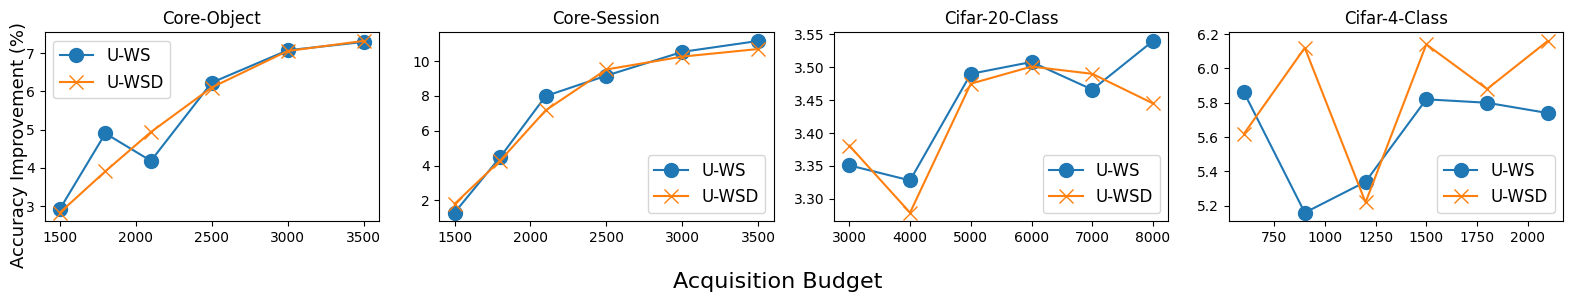

In [16]:
# # seq (checked)
# core_session= {
#     'U-WS': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764],
#     'U-WSD':[2.636, 5.755, 9.691, 10.527, 11.755, 12.509]
# }

# core_object= {
#     'U-WS':  [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
#     'U-WSD': [6.327, 6.855, 7.364, 8.264, 9.327, 9.664]
# }

# cifar = {
#     'U-WS': [6.34, 6.56, 6.88, 7.82, 7.42, 7.64],
#     'U-WSD': [6.86, 7.16, 6.94, 7.54, 7.02, 7.34]
# }

# cifar_init = {
#     'U-WS': [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
#     'U-WSD':  [4.44, 4.573, 4.709, 4.68, 4.476, 4.44]
# }

# one-shot
core_session= {
    'U-WS':  [1.3, 4.482, 7.991, 9.164, 10.527, 11.155],
    'U-WSD': [1.8, 4.282, 7.173, 9.518, 10.255, 10.691]
}

core_object= {
    'U-WS':  [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'U-WSD': [2.827, 3.909, 4.936, 6.1, 7.055, 7.318]
}

cifar = {
    'U-WS': [5.86, 5.16, 5.34, 5.82, 5.8, 5.74], #
    'U-WSD': [5.62, 6.12, 5.22, 6.14, 5.88, 6.16] #
}

cifar_init = {
    'U-WS': [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'U-WSD': [3.381, 3.279, 3.475, 3.501, 3.49, 3.445]
}

marker = {
    'U-WS':  'o',
    'U-WSD':  'x',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Core-Object')
ax[0].legend(fontsize=12)

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Session')
ax[1].legend(fontsize=12)

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Cifar-20-Class')
ax[2].legend(fontsize=12)
# ax[0].set_yticklabels(fontsize=10)

n_data = [600, 900, 1200, 1500, 1800, 2100]
for key,val in cifar.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[3].set_title('Cifar-4-Class')
ax[3].legend(fontsize=12)


# fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

### AE-C

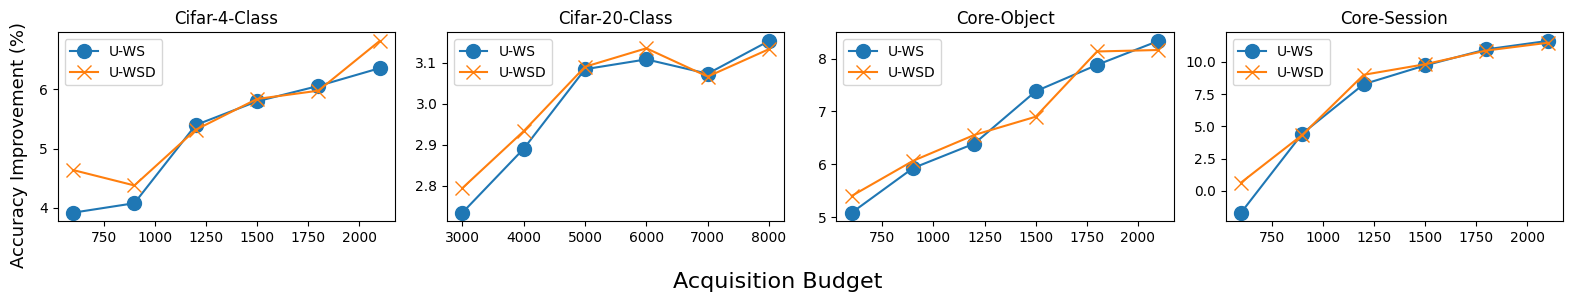

In [18]:
# seq (checked)
core_session= {
    'U-WS': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],
    'U-WSD': [0.636, 4.336, 8.991, 9.809, 10.873, 11.473]
}

core_object= {
    'U-WS':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],
    'U-WSD':  [5.4, 6.064, 6.555, 6.9, 8.136, 8.164]
}

cifar = {
    'U-WS': [3.92, 4.08, 5.4, 5.8, 6.06, 6.36], 
    'U-WSD': [4.64, 4.38, 5.32, 5.84, 5.98, 6.82]
}

cifar_init = {
    'U-WS': [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
    'U-WSD': [2.794, 2.933, 3.09, 3.135, 3.066, 3.133]
}

# # one-shot
# core_session= {
#     'U-WS':  [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
#     'U-WSD': [-0.591, 2.345, 6.064, 8.127, 8.764, 8.873]
# }

# core_object= {
#     'U-WS':  [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
#     'U-WSD': [0.482, 1.636, 2.964, 4.627, 5.627, 5.855]
# }

# cifar = {
#     'U-WS':   [4.02, 3.74, 4.14, 4.4, 4.76, 4.78],#
#     'U-WSD': [3.92, 4.24, 3.56, 4.6, 4.66, 4.64]#
# }

# cifar_init = {
#     'U-WS':  [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],
#     'U-WSD': [1.641, 1.74, 2.004, 2.034, 2.135, 2.155]
# }

marker = {
    'U-WS':  'o',
    'U-WSD':  'x',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Cifar-20-Class')
ax[1].legend(fontsize=10)

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=10)

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Object')
ax[2].legend(fontsize=10)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[3].set_title('Core-Session')
ax[3].legend(fontsize=10)

# fig.legend(loc='lower right', fontsize=15)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

## U-WSd with pd + svm

### Db size

In [ ]:

# core_session= {
#     '0': [600.0, 900.0, 1200.0, 1500.0, 1800.0, 2100.0],
#     # '0.5': [600.0, 900.0, 1200.0, 1500.0, 1731.9, 1835.8],
#     '0.6': [600.0, 900.0, 1200.0, 1446.0, 1547.5, 1579.9],
#     '0.7':  [600.0, 900.0, 1169.5, 1269.2, 1322.0, 1326.8]
# }
# core_object= {
#     '0': [600.0, 900.0, 1200.0, 1500.0, 1800.0, 2100.0],
#     # '0.5': [600.0, 900.0, 1200.0, 1471.2, 1681.2, 1788.5],
#     '0.6': [600.0, 899.9, 1137.5, 1315.8, 1426.9, 1460.9],
#     '0.7':  [594.5, 803.4, 945.3, 1053.5, 1119.4, 1119.4],
# }
# cifar = {
#     '0': [600.0, 900.0, 1200.0, 1500.0, 1800.0, 2100.0],
#     # '0.5': [600.0, 900.0, 1200.0, 1500.0, 1800.0, 2097.4],
#     '0.6': [600.0, 900.0, 1200.0, 1500.0, 1790.5, 1988.1],
#     '0.7': [600.0, 900.0, 1182.3, 1382.4, 1514.2, 1535.2],
# }

# core_session= {
#     '0': [77.017, 75.478, 72.908, 69.96, 66.589, 63.205],
#     '0.6': [77.017, 75.478, 72.908, 70.68, 69.896, 69.621],
#     '0.7':  [77.017, 75.478, 73.299, 73.021, 72.805, 72.758]
# }
# core_object= {
#     '0': [56.167, 53.122, 51.775, 50.647, 49.183, 47.219],
#     '0.6': [56.167, 53.128, 52.435, 52.202, 51.683, 51.381],
#     '0.7':  [56.205, 54.714, 54.731, 54.725, 54.46, 54.46],
# }
# cifar = {
#     '0': [70.417, 69.567, 68.65, 67.367, 66.239, 64.824],
#     '0.6': [70.417, 69.567, 68.65, 67.367, 66.303, 65.324],
#     '0.7': [70.417, 69.567, 68.677, 67.835, 67.336, 67.199],
# }

core_session= {
    '0': [462.1, 679.3, 874.9, 1049.4, 1198.6, 1327.3],
    '0.6': [462.1, 679.3, 874.9, 1020.3, 1073.9, 1089.9],
    '0.7':  [462.1, 679.3, 856.3, 919.9, 950.6, 952.8]
}
core_object= {
    '0': [337.0, 478.1, 621.3, 759.7, 885.3, 991.6],
    '0.6': [337.0, 478.1, 594.6, 680.5, 727.3, 738.9],
    '0.7':  [333.9, 432.8, 503.0, 557.4, 587.2, 587.2],
}
cifar = {
    '0': [422.5, 626.1, 823.8, 1010.5, 1192.3, 1361.3],
    '0.6': [422.5, 626.1, 823.8, 1010.5, 1187.2, 1297.3],
    '0.7': [422.5, 626.1, 812.3, 937.0, 1016.3, 1026.7],
}

labels = ['0', '0.6', '0.7']
pattern = {'0': '', '0.6': '/', '0.7': 'o'}
n_data = [600, 900, 1200, 1500, 1800, 2100]

fig, ax = plt.subplots(2,2, figsize=(10, 5))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(len(n_data))



multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[0].bar(x + offset, core_object[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1
ax[0].set_xticks(x + width, n_data)
ax[0].set_title('Core-Object')
# ax[0].set_ylim(0,100)

multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[1].bar(x + offset, core_session[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1
ax[1].set_xticks(x + width, n_data)
ax[1].set_title('Core-Session')
# ax[1].set_ylim(0,100)

multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[2].bar(x + offset, cifar[threshold], width, label=threshold,fill=False, hatch=pattern[threshold])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
# ax[0].legend(loc='upper left', ncols=3)
ax[2].set_title('Cifar-4-Class')
# ax[2].set_ylim(0,100)

fig.delaxes(ax[3])

fig.legend(loc='lower right', fontsize=15)
fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('The Number of Acquired Weakness', fontsize=12)
fig.tight_layout()
fig.show()

### error percent

In [ ]:

core_session= {
    '0': [77.017, 75.478, 72.908, 69.96, 66.589, 63.205],
    '0.6': [77.017, 75.478, 72.908, 70.68, 69.896, 69.621],
    '0.7':  [77.017, 75.478, 73.299, 73.021, 72.805, 72.758]
}
core_object= {
    '0': [56.167, 53.122, 51.775, 50.647, 49.183, 47.219],
    '0.6': [56.167, 53.128, 52.435, 52.202, 51.683, 51.381],
    '0.7':  [56.205, 54.714, 54.731, 54.725, 54.46, 54.46],
}
cifar = {
    '0': [70.417, 69.567, 68.65, 67.367, 66.239, 64.824],
    '0.6': [70.417, 69.567, 68.65, 67.367, 66.303, 65.324],
    '0.7': [70.417, 69.567, 68.677, 67.835, 67.336, 67.199],
}

labels = ['0', '0.6', '0.7']
pattern = {'0': '', '0.6': '/', '0.7': 'o'}
n_data = [600, 900, 1200, 1500, 1800, 2100]

fig, ax = plt.subplots(2,2, figsize=(10, 5))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(len(n_data))

multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[0].bar(x + offset, core_object[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1
ax[0].set_xticks(x + width, n_data)
ax[0].set_title('Core-Object')
ax[0].set_ylim(0,100)

multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[1].bar(x + offset, core_session[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1
ax[1].set_xticks(x + width, n_data)
ax[1].set_title('Core-Session')
ax[1].set_ylim(0,100)

multiplier = 0

for threshold in labels:
    offset = width * multiplier
    rects = ax[2].bar(x + offset, cifar[threshold], width, label=threshold,fill=False, hatch=pattern[threshold])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_title('Cifar-4-Class')
ax[2].set_ylim(0,100)

fig.delaxes(ax[3])

fig.legend(loc='lower right', fontsize=15)
fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Percentage of Misclassifications', fontsize=12)
fig.tight_layout()
fig.show()

### acc

In [ ]:
core_session= {
    '0': [5.564, 6.8, 8.091, 9.673, 10.164, 10.364],
    # '0.5': [5.564, 6.8, 8.091, 9.673, 9.909, 10.091],
    '0.6': [5.564, 6.8, 8.091, 9.345, 9.636, 9.709],
    '0.7':  [5.564, 6.8, 8.391, 9.082, 9.036, 9.118],
}
core_object= {
    '0': [3.727, 5.018, 5.418, 6.227, 6.527, 6.727],
    # '0.5': [3.727, 5.018, 5.418, 6.091, 6.273, 6.482],
    '0.6': [3.727, 5.0, 5.464, 6.036, 6.209, 6.164],
    '0.7':  [3.709, 4.373, 4.855, 5.127, 5.236, 5.236],
}

cifar = {
    '0': [1.66, 3.26, 2.86, 3.08, 2.94, 3.4],
    # '0.5': [1.64, 3.32, 2.9, 3.16, 2.96, 3.32],
    '0.6': [1.66, 3.36, 2.9, 3.14, 2.8, 3.36],
    '0.7':  [1.58, 3.32, 3.04, 3.34, 3.12, 3.54],
}

marker = {
    '0': 's',
    # '0.5': 'o',
    '0.6': 'o',
    '0.7': 'd'
}

fig, ax = plt.subplots(2,2, figsize=(10,5))
# fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object')

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Session')

for key,val in cifar.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Cifar-4-Class')

fig.delaxes(ax[3])
# fig.legend(loc='lower right', fontsize=15)
fig.legend(loc='lower right', fontsize=12)


fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Accuracy Improvement (%)', fontsize=12)
fig.tight_layout()
fig.show()

### seq

#### acc

In [ ]:
core_session= {
    '0': [5.564, 6.8, 8.091, 9.673, 10.164, 10.364],
    # '0.5': [5.564, 6.8, 8.091, 9.673, 9.909, 10.091],
    '0.6': [5.564, 6.8, 8.091, 9.345, 9.636, 9.709],
    '0.7':  [5.564, 6.8, 8.391, 9.082, 9.036, 9.118],
}
core_object= {
    '0': [3.727, 5.018, 5.418, 6.227, 6.527, 6.727],
    # '0.5': [3.727, 5.018, 5.418, 6.091, 6.273, 6.482],
    '0.6': [3.727, 5.0, 5.464, 6.036, 6.209, 6.164],
    '0.7':  [3.709, 4.373, 4.855, 5.127, 5.236, 5.236],
}

cifar = {
    '0': [1.66, 3.26, 2.86, 3.08, 2.94, 3.4],
    # '0.5': [1.64, 3.32, 2.9, 3.16, 2.96, 3.32],
    '0.6': [1.66, 3.36, 2.9, 3.14, 2.8, 3.36],
    '0.7':  [1.58, 3.32, 3.04, 3.34, 3.12, 3.54],
}

marker = {
    '0': 's',
    # '0.5': 'o',
    '0.6': 'o',
    '0.7': 'd'
}

fig, ax = plt.subplots(2,2, figsize=(10,5))
# fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object')

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Session')

for key,val in cifar.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Cifar-4-Class')

fig.delaxes(ax[3])
# fig.legend(loc='lower right', fontsize=15)
fig.legend(loc='lower right', fontsize=12)


fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Accuracy Improvement (%)', fontsize=12)
fig.tight_layout()
fig.show()

## U-WS with log

### Db size

In [ ]:
# core_session= {
#     '0': [600, 900, 1200, 1500, 1800, 2100],
#     '0.65':  [600.0, 900.0, 1200.0, 1491.5, 1760.7, 1970.8],
#     '0.7': [600.0, 900.0, 1164.2, 1374.2, 1584.2, 1757.5],
#     '0.6': np.zeros(6)
# }
# core_object= {
#     '0': [600, 900, 1200, 1500, 1800, 2100],
#     '0.65':  [600.0, 865.2, 1065.8, 1245.8, 1425.8, 1605.8],
#     '0.7': [476.7, 656.7, 836.7, 1016.7, 1188.5, 1329.1],
#     '0.6':np.zeros(6)

# }

# cifar = {
#     '0': [600, 900, 1200, 1500, 1800, 2100],
#     '0.6': [600.0, 900.0, 1200.0, 1455.4, 1678.2, 1880.1],
#     '0.7':  [512.6, 722.6, 929.4, 1049.3, 1109.3, 1155.2],
#     '0.65':np.zeros(6)
# }

core_session= {
    '0':  [501.8, 715.7, 901.7, 1067.4, 1204.4, 1325.6],
    '0.65':  [501.8, 715.7, 901.7, 1062.0, 1186.9, 1272.0],
    '0.7': [501.8, 715.7, 880.5, 997.5, 1095.8, 1165.9],
    '0.6': np.zeros(6)
}
core_object= {
    '0': [366.9, 513.4, 649.1, 767.1, 883.0, 991.6],
    '0.65':  [366.9, 498.5, 590.0, 661.6, 731.5, 797.9],
    '0.7': [300.7, 388.8, 471.1, 542.7, 609.6, 660.4],
    '0.6':np.zeros(6)
}

cifar = {
    '0': [421.0, 619.2, 811.1, 995.8, 1172.7, 1345.7],
    '0.6': [421.0, 619.2, 811.1, 969.5, 1100.5, 1217.6],
    '0.7':  [360.4, 498.0, 631.9, 706.2, 737.4, 762.3],
    '0.65':np.zeros(6)
}
labels = ['0', '0.65', '0.7', '0.6']
pattern = {'0': '', '0.65': '/', '0.7': 'o', '0.6': '-'}
n_data = [600, 900, 1200, 1500, 1800, 2100]

fig, ax = plt.subplots(2,2, figsize=(10, 5))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(len(n_data))

multiplier = 0

for threshold in core_object.keys():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, core_object[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1

ax[0].set_xticks(x + width, n_data)
ax[0].set_title('Core-Object')

multiplier = 0

for threshold in core_session.keys():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, core_session[threshold], width, fill=False, hatch=pattern[threshold])
    multiplier += 1
ax[1].set_xticks(x + width, n_data)
ax[1].set_title('Core-Session')

multiplier = 0

for threshold in cifar.keys():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, cifar[threshold], width, label=threshold,fill=False, hatch=pattern[threshold])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
# ax[0].legend(loc='upper left', ncols=3)
ax[2].set_title('Cifar-4-Class')

fig.delaxes(ax[3])

fig.legend(loc='lower right', fontsize=12)
fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('The Number of Acquired Weakness', fontsize=12)
fig.tight_layout()
fig.show()

### acc

In [ ]:
core_session= {
    '0': [3.755, 7.064, 7.873, 9.327, 10.3, 10.809],
    '0.65':  [3.755, 7.064, 7.873, 9.164, 10.064, 10.636],
    '0.7': [3.755, 7.064, 7.255, 8.164, 9.0, 9.391],
}
core_object= {
    '0': [2.745, 3.773, 4.591, 6.364, 6.909, 6.909],
    '0.65':  [2.745, 3.636, 4.509, 5.545, 5.945, 5.809],
    '0.7': [1.918, 2.555, 3.527, 4.564, 4.936, 5.055],

}

cifar = {
    '0': [1.18, 2.34, 3.18, 3.56, 3.46, 3.02],
    '0.6':  [1.58, 3.32, 3.04, 3.34, 3.12, 3.54],
    '0.7': [0.44, 1.28, 2.08, 2.06, 2.44, 2.08],

}

marker = {
    '0': 's',
    '0.65': 'o',
    '0.7': 'd',
    '0.6': 'o'
}

fig, ax = plt.subplots(2,2, figsize=(10,5))
# fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()


for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object')
ax[0].legend()

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[1].set_title('Core-Session')
ax[1].legend()


for key,val in cifar.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[2].set_title('Cifar-4-Class')
ax[2].legend()

fig.delaxes(ax[3])
# fig.legend(loc='lower right', fontsize=15)
# fig.legend(loc='lower right', fontsize=12)


fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Accuracy Improvement (%)', fontsize=12)
fig.tight_layout()
fig.show()

### seq

#### acc

In [ ]:
core_session= {
    '0': [3.855, 6.864, 8.545, 9.727, 10.527, 11.136],
    '0.6':  [3.855, 6.782, 7.491, 8.109, 8.182, 8.773],
    '0.7': [3.855, 5.409, 5.8, 6.636, 8.0, 8.655]
}
core_object= {
    '0': [4.755, 5.845, 6.9, 7.736, 8.427, 8.464],
    '0.6':  [4.755, 5.791, 6.391, 7.0, 7.564, 7.964],
    '0.7': [4.427, 4.809, 4.745, 5.091, 5.218, 5.591]

}

cifar = {
    '0': [2.08, 3.48, 4.52, 3.58, 3.96, 4.2],
    '0.6':  [1.46, 2.1, 2.24, 3.16, 3.28, 3.38],
    '0.7': [0.56, 2.76, 2.1, 2.26, 1.84, 1.92],

}

marker = {
    '0': 's',
    '0.65': 'o',
    '0.7': 'd',
    '0.6': 'o'
}

fig, ax = plt.subplots(2,2, figsize=(10,5))
# fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()


for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Core-Object')
ax[0].legend()

for key,val in core_session.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[1].set_title('Core-Session')
ax[1].legend()


for key,val in cifar.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[2].set_title('Cifar-4-Class')
ax[2].legend()

fig.delaxes(ax[3])

fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Accuracy Improvement (%)', fontsize=12)
fig.tight_layout()
fig.show()

# complexity

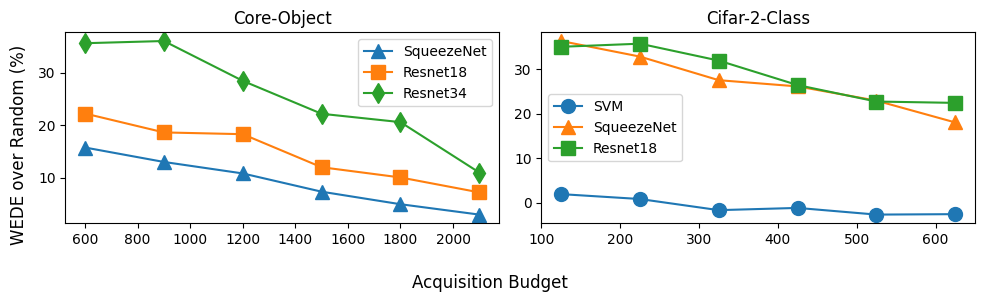

In [ ]:
core_object= {
    'SqueezeNet':  np.array([6.245, 6.864, 7.682, 8.473, 9.091, 9.673]) - np.array([-9.518, -6.155, -3.155, 1.109, 4.109, 6.664]),
    'Resnet18': np.array([1.582, 2.618, 4.545, 6.482, 7.382, 8.7]) - np.array([-20.645, -16.018, -13.755, -5.536, -2.691, 1.464]),
    'Resnet34':  np.array([3.727, 5.182, 5.409, 6.191, 6.355, 7.509]) - np.array([-31.873, -30.836, -23.036, -15.991, -14.236, -3.5]),
}

cifar = {
    'SVM': [1.9,0.8,-1.7,-1.2,-2.7,-2.6],
    'SqueezeNet':  np.array([1.8, 1.9, 1.6, 1.1, 1.1, 0.9]) - np.array([-34.5, -30.9, -25.9, -25.0, -21.8, -17.1]),
    'Resnet18': np.array([1.8, 1.7, 1.3, 1.3, 1.6, 1.2]) - np.array([-33.2, -34.0, -30.6, -25.1, -21.1, -21.2])
}


marker = {
    'SVM': 'o',
    'SqueezeNet': '^',
    'Resnet18': 's',
    'Resnet34': 'd'
}

fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()
for key,val in core_object.items():
    ax[0].plot(n_data, val, marker = marker[key], label=key, markersize=10)
ax[0].set_title('Core-Object')
ax[0].legend()

n_data = [125, 225, 325, 425, 525, 625]
for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], label=key, markersize=10)
ax[1].set_title('Cifar-2-Class')
ax[1].legend()

# fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.supxlabel('Acquisition Budget',fontsize=12)
fig.supylabel('WEDE over Random (%)',fontsize=12)
fig.tight_layout()
fig.show()

# shift degree

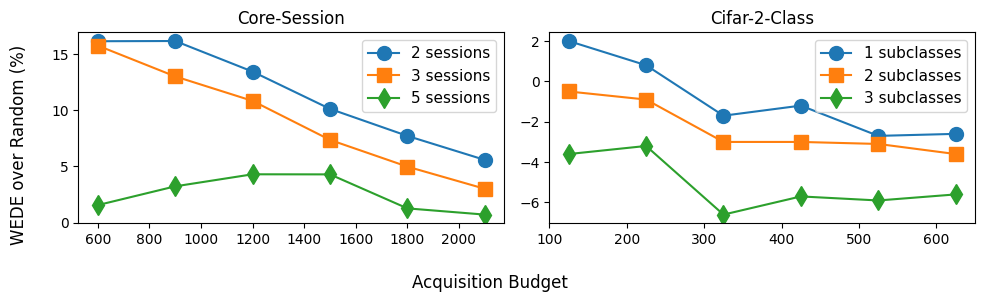

In [ ]:
core = {
    '2 sessions':  np.array([2.518, 5.9, 6.173, 7.118, 7.709, 8.127]) - np.array([-13.636, -10.273, -7.273, -3.009, -0.009, 2.545]),
    '3 sessions': np.array([6.245, 6.864, 7.682, 8.473, 9.091, 9.673]) - np.array([-9.518, -6.155, -3.155, 1.109, 4.109, 6.664]),
    '5 sessions':  np.array([1.4, 6.436, 10.509, 14.764, 14.736, 16.736]) - np.array([-0.155, 3.209, 6.209, 10.473, 13.473, 16.027])
} #(checked)
cifar = {
    '1 subclasses': [2,0.8,-1.7,-1.2,-2.7,-2.6],
    '2 subclasses': [-0.5,-0.9,-3,-3,-3.1,-3.6],
    '3 subclasses': [-3.6,-3.2,-6.6,-5.7,-5.9,-5.6]
}
marker = {
    '2 sessions':  'o',
    '3 sessions': 's',
    '5 sessions':  'd',
    '1 subclasses': 'o',
    '2 subclasses': 's',
    '3 subclasses': 'd'
}

fig, ax = plt.subplots(1,2, figsize=(10,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()
for key,val in core.items():
    ax[0].plot(n_data, val, marker = marker[key], label = key, markersize=10)
ax[0].set_title('Core-Session')
ax[0].legend(loc='upper right', fontsize=11)

n_data = [125, 225, 325, 425, 525, 625]
for key,val in cifar.items():
    ax[1].plot(n_data, val, label = key, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-2-Class')
ax[1].legend(loc='upper right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('WEDE over Random (%)', fontsize=12)
fig.tight_layout()
fig.show()

# SVM vs Log 

## error in test data

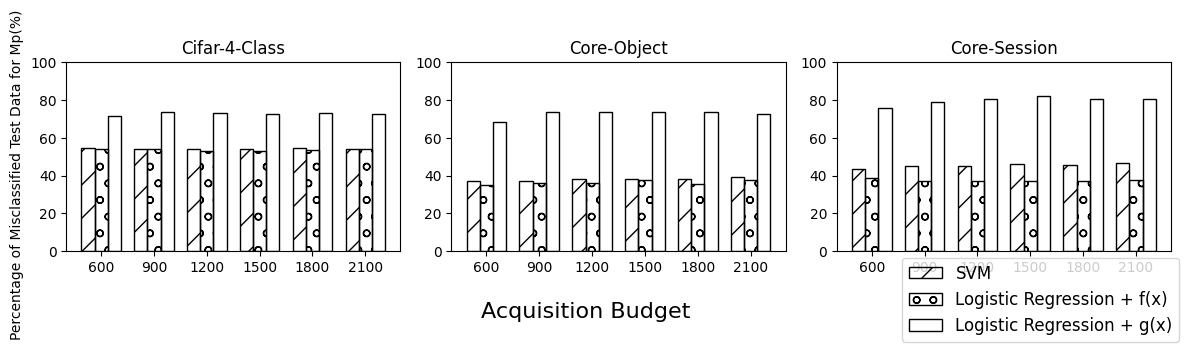

In [ ]:

core_session= {
    'SVM': [43.257, 45.104, 44.814, 46.135, 45.514, 46.572],
    'Logistic Regression + f(x)': [38.441, 37.335, 37.144, 37.204, 37.059, 37.657],
    'Logistic Regression + g(x)': [75.868, 79.048, 80.576, 81.836, 80.641, 80.559]
}

core_object= {
    'SVM': [37.131, 37.228, 38.074, 38.3, 38.21, 39.172],
    'Logistic Regression + f(x)': [34.832, 35.921, 36.279, 37.434, 35.605, 37.561],
    'Logistic Regression + g(x)': [68.259, 73.57, 73.83, 73.426, 73.841, 72.545]
}

cifar = {
    'SVM': [54.344, 53.943, 54.101, 53.997, 54.325, 54.065], 
    'Logistic Regression + f(x)': [54.171, 53.856, 52.769, 52.786, 53.381, 54.054],
    'Logistic Regression + g(x)': [71.705, 73.352, 72.868, 72.415, 72.829, 72.731]
}

labels = ['SVM', 'Logistic Regression + f(x)', 'Logistic Regression + g(x)']
pattern = {'Logistic Regression + g(x)': '', 'SVM': '/', 'Logistic Regression + f(x)': 'o'}
n_data = [600, 900, 1200, 1500, 1800, 2100]

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(6)

multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
# ax[0].legend(loc='upper left', ncols=3)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-4-Class')

multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data)
ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=12)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Misclassified Test Data for Mp(%)', fontsize=10)
fig.tight_layout()
fig.show()

## weak detection acc

### one-shot

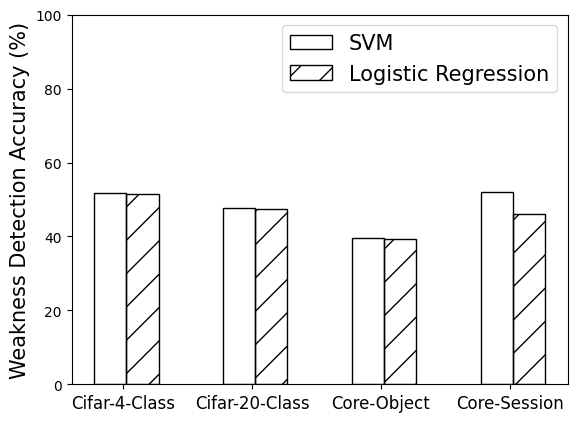

In [9]:
core_session ={
    'SVM': 52.047,
    'Logistic Regression': 46.045,
}
core_object ={
    'SVM': 39.48,
    'Logistic Regression': 39.329,
}
cifar ={
    'SVM': 51.817,
    'Logistic Regression': 51.419,
}
cifar_init ={
    'SVM': 47.649,
    'Logistic Regression': 47.511,
}
x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
pattern ={
    'SVM': '', 
    'Logistic Regression': '/'
}
for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [cifar[key], cifar_init[key], core_object[key], core_session[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Weakness Detection Accuracy (%)', fontsize=15)
plt.xticks(x + 0.1, ['Cifar-4-Class', 'Cifar-20-Class', 'Core-Object', 'Core-Session'], fontsize=12)
plt.legend(fontsize=15)
plt.ylim(0, 100)

plt.show()

### seq

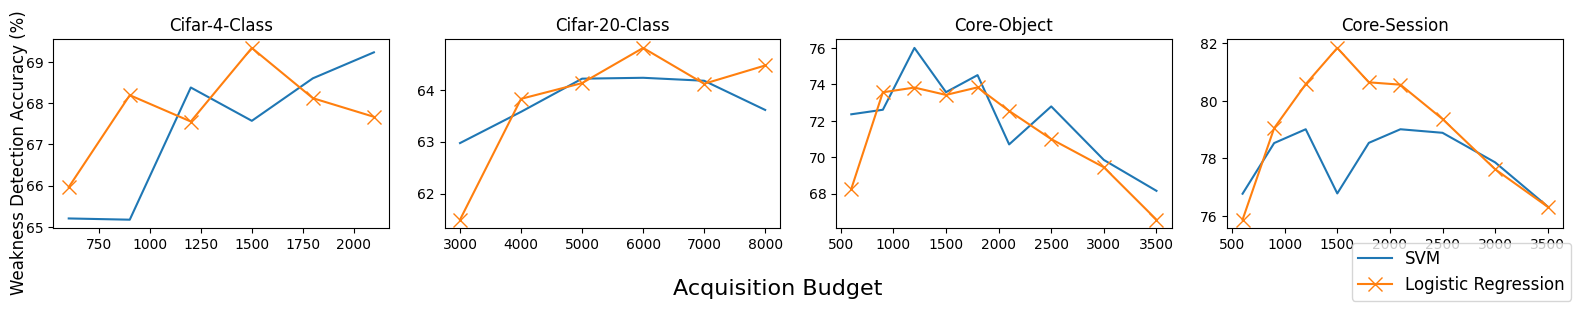

In [10]:
core_session= {
    'SVM': [76.77, 78.53, 79.01, 76.78, 78.538, 79.01, 78.887, 77.86, 76.322],
    'Logistic Regression': [75.868, 79.048, 80.576, 81.836, 80.641, 80.559, 79.366, 77.62, 76.314]
}

core_object= {
    'SVM': [72.36, 72.61, 76.01, 73.577, 74.514, 70.705, 72.793, 69.85, 68.151],
    'Logistic Regression': [68.259, 73.57, 73.83, 73.426, 73.841, 72.545, 70.996, 69.447, 66.564]
}

cifar = {
    'SVM': [65.201, 65.171, 68.377, 67.569, 68.6, 69.23],
    'Logistic Regression': [65.96, 68.191, 67.552, 69.337, 68.118, 67.666]
}

cifar_init = {
    'SVM': [62.971, 63.573, 64.211, 64.228, 64.171, 63.609], 
    'Logistic Regression': [61.496, 63.823, 64.126, 64.803, 64.113, 64.465]
}

marker = {
    'SVM': '',
    'Logistic Regression': 'x'
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-4-Class')

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100, 2500, 3000, 3500]
for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')


# labels = ['SVM', 'Logistic Regression']
# pattern = {'Logistic Regression': '', 'SVM': '/'}
# fig, ax = plt.subplots(1,4, figsize=(16,3))
# ax = ax.flatten()

# width = 0.25  # the width of the bars
# x = np.arange(6)

# n_data = [600, 900, 1200, 1500, 1800, 2100]

# multiplier = 0
# for key, values in cifar.items():
#     offset = width * multiplier
#     rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0].set_xticks(x + width, n_data)
# # ax[0].legend(loc='upper left', ncols=3)
# ax[0].set_ylim(0, 100)
# ax[0].set_title('Cifar-4-Class')

# multiplier = 0
# for key, values in core_object.items():
#     offset = width * multiplier
#     rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[1].set_xticks(x + width, n_data)
# ax[1].set_ylim(0, 100)
# ax[1].set_title('Core-Object')

# multiplier = 0
# for key, values in core_session.items():
#     offset = width * multiplier
#     rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[2].set_xticks(x + width, n_data)
# ax[2].set_ylim(0, 100)
# ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=12)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Weakness Detection Accuracy (%)', fontsize=12)
fig.tight_layout()
fig.show()

## acc

### AE-W

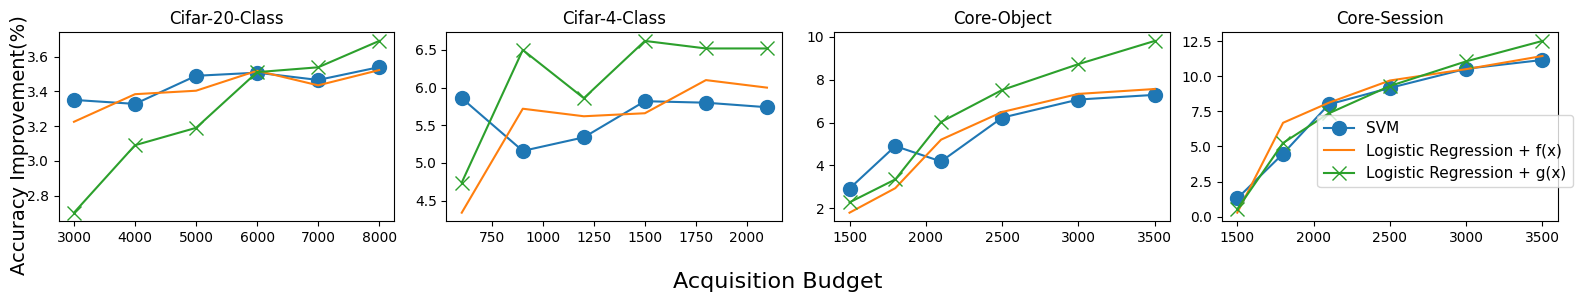

In [12]:
# # Seq (checked)
# core_session= {
#     'SVM': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764], 
#     'Logistic Regression + f(x)': [0.882, 7.927, 9.291, 10.8, 11.982, 12.518],
#     'Logistic Regression + g(x)': [1.018, 7.555, 8.873, 10.173, 11.655, 12.409]
# }

# core_object= {
#     'SVM': [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  
#     'Logistic Regression + f(x)': [6.1, 7.691, 7.455, 8.918, 9.655, 10.1],
#     'Logistic Regression + g(x)': [5.891, 7.691, 7.527, 9.118, 9.655, 10.436]
# }

# cifar = {
#     'SVM': [6.34, 6.56, 6.88, 7.82, 7.42, 7.64],
#     'Logistic Regression + f(x)': [6.78, 6.66, 6.94, 7.82, 7.58, 7.56], 
#     'Logistic Regression + g(x)': [6.46, 6.44, 6.08, 6.56, 6.88, 6.72], 
# }

# cifar_init = {
#     'SVM': [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],
#     'Logistic Regression + f(x)': [4.025, 4.616, 4.644, 4.689, 4.564, 4.479], 
#     'Logistic Regression + g(x)': [4.113, 4.554, 4.603, 4.626, 4.445, 4.408]
# }

# One-shot
core_session= {
    'SVM': [1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
    'Logistic Regression + f(x)': [0.282, 6.682, 8.109, 9.691, 10.5, 11.436],
    'Logistic Regression + g(x)':[0.536, 5.245, 7.355, 9.3, 11.055, 12.509]
}

core_object= {
    'SVM': [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
    'Logistic Regression + f(x)': [1.791, 2.936, 5.2, 6.491, 7.336, 7.564],
    'Logistic Regression + g(x)':[2.273, 3.345, 6.027, 7.518, 8.727, 9.809]
}

cifar = {
    'SVM': [5.86, 5.16, 5.34, 5.82, 5.8, 5.74],
    'Logistic Regression + f(x)': [4.34, 5.72, 5.62, 5.66, 6.1, 6.0],
    'Logistic Regression + g(x)': [4.74, 6.5, 5.86, 6.62, 6.52, 6.52]
}

cifar_init = {
    'SVM': [3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
    'Logistic Regression + f(x)': [3.225, 3.384, 3.404, 3.519, 3.435, 3.523], 
    'Logistic Regression + g(x)': [2.701, 3.09, 3.19, 3.511, 3.539, 3.691]
}

marker = {
    'Logistic Regression + f(x)': '',
    'SVM':  'o',
    'Logistic Regression + g(x)': 'x'
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='center right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement(%)', fontsize=14)
fig.tight_layout()
fig.show()

### AE-C-WP

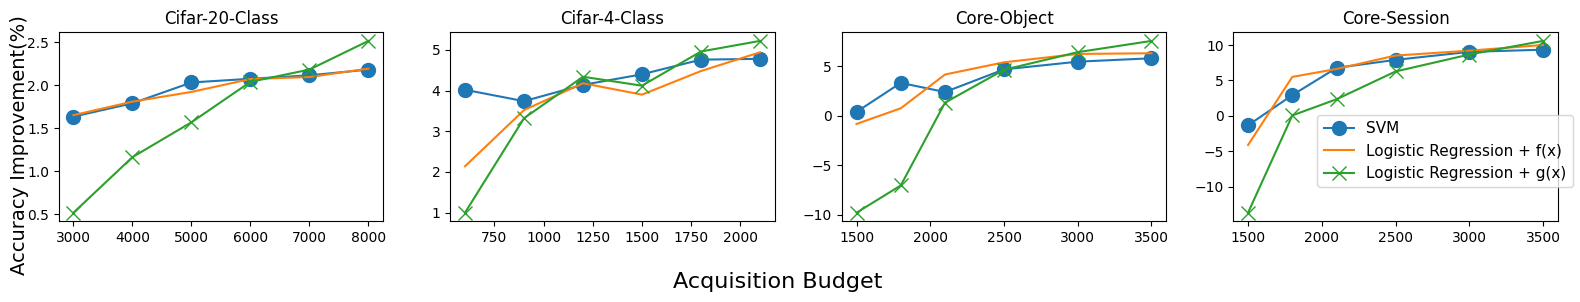

In [14]:
# # Seq (checked)
# core_session= {
#     'SVM': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],
#     'Logistic Regression + f(x)': [-1.391, 6.873, 8.336, 9.945, 10.927, 11.482],
#     'Logistic Regression + g(x)': [0.273, 7.009, 7.973, 9.191, 10.318, 10.973]
# }

# core_object= {
#     'SVM': [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],
#     'Logistic Regression + f(x)': [4.4, 6.455, 6.509, 7.764, 8.509, 8.655],
#     'Logistic Regression + g(x)': [4.836, 6.518, 6.518, 7.445, 8.391, 8.527]
# }

# cifar = {
#     'SVM': [3.92, 4.08, 5.4, 5.8, 6.06, 6.36], #
#     'Logistic Regression + f(x)': [4.5, 5.26, 5.14, 6.38, 6.54, 6.46], # 
#     'Logistic Regression + g(x)': [4.34, 5.02, 4.72, 5.78, 5.74, 5.84], #
# }

# cifar_init = {
#     'SVM': [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
#     'Logistic Regression + f(x)': [2.325, 2.988, 3.058, 3.128, 3.176, 3.161],
#     'Logistic Regression + g(x)': [2.298, 2.768, 2.869, 2.913, 2.951, 3.02]
# }

# One-shot
core_session= {
    'SVM': [-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
    'Logistic Regression + f(x)': [-4.1, 5.509, 6.627, 8.518, 9.209, 10.009],
    'Logistic Regression + g(x)': [-13.645, 0.073, 2.355, 6.273, 8.664, 10.582]
}

core_object= {
    'SVM': [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
    'Logistic Regression + f(x)': [-0.818, 0.764, 4.182, 5.418, 6.264, 6.336],
    'Logistic Regression + g(x)': [-9.8, -7.045, 1.336, 4.664, 6.445, 7.582]
}

cifar = {
    'SVM': [4.02, 3.74, 4.14, 4.4, 4.76, 4.78], #
    'Logistic Regression + f(x)': [2.14, 3.52, 4.18, 3.9, 4.48, 4.94], # 
    'Logistic Regression + g(x)': [1.0, 3.32, 4.34, 4.12, 4.96, 5.22], #
}
cifar_init = {
    'SVM': [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],
    'Logistic Regression + f(x)': [1.653, 1.81, 1.923, 2.073, 2.096, 2.194],
    'Logistic Regression + g(x)':[0.519, 1.165, 1.57, 2.04, 2.183, 2.516]
}


marker = {
    'Logistic Regression + f(x)': '',
    'SVM':  'o',
    'Logistic Regression + g(x)': 'x'
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='center right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement(%)', fontsize=14)
fig.tight_layout()
fig.show()

# greedy vs seq

## total acc

In [ ]:
core_session= {
    'one-shot + AE': [4.782, 7.182, 7.809, 9.427, 10.082, 10.4],
    'sequential + AE': [5.991, 7.427, 8.427, 8.0, 10.655, 11.091],
    'one-shot + WTA': [4.064, 6.355, 6.855, 8.236, 8.791, 8.991],
    'sequential + WTA':[-5.618, -1.445, 0.209, 1.464, 5.336, 7.745],
}
core_object= {
    'one-shot + AE': [3.373, 4.509, 5.609, 5.945, 6.3, 7.191],
    'sequential + AE':  [5.427, 5.918, 6.673, 7.745, 7.964, 8.791],
    'one-shot + WTA': [2.1, 3.464, 4.482, 4.818, 5.0, 5.982],
    'sequential + WTA': [-7.918, -4.545, -1.591, 2.255, 3.591, 5.582],
}

cifar = {
    'one-shot + AE': [1.84, 3.44, 3.02, 3.12, 2.78, 4.2],
    'sequential + AE':  [2.04, 2.9, 3.36, 3.74, 3.98, 4.22],
    'one-shot + WTA': [-0.06, 1.68, 1.42, 1.9, 2.34, 3.56],
    'sequential + WTA': [-8.08, -6.82, -4.48, -4.88, -1.94, -1.0],
}

marker = {
    'one-shot + WTA':  'x',
    'sequential + WTA': 's',
    'one-shot + AE':  'o',
    'sequential + AE':  '^',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-4-Class')

for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Object')

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=12)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=13)
fig.tight_layout()
fig.show()

## AE-C-WP

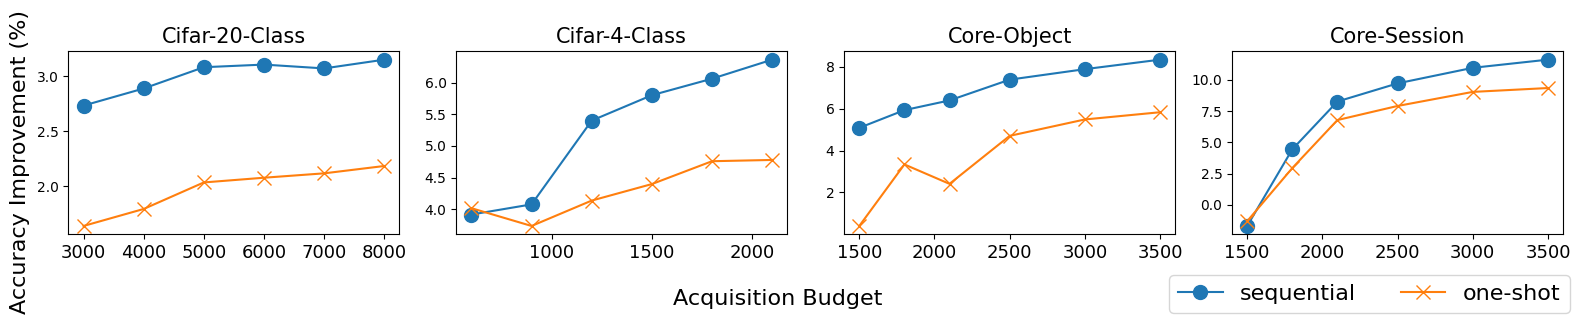

In [13]:
#(checked)
core_session= {
    'sequential': [-1.7, 4.436, 8.264, 9.718, 10.964, 11.618],
    'one-shot':[-1.318, 2.936, 6.782, 7.909, 9.036, 9.345],
}
core_object= {
    'sequential':  [5.082, 5.927, 6.391, 7.382, 7.882, 8.336],
    'one-shot': [0.4, 3.336, 2.409, 4.7, 5.482, 5.827],
}

cifar = {
    'sequential':[3.92, 4.08, 5.4, 5.8, 6.06, 6.36],
    'one-shot': [4.02, 3.74, 4.14, 4.4, 4.76, 4.78],
}

cifar_init = {
    'sequential': [2.734, 2.89, 3.084, 3.108, 3.073, 3.153],
    'one-shot': [1.636, 1.791, 2.033, 2.076, 2.116, 2.183],
}

marker = {
    'one-shot': 'x',
    'sequential':  'o',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class',fontsize=15)
ax[0].tick_params(axis='x', labelsize=13)
# ax[0].legend(fontsize=11)

n_data = [600, 900, 1200, 1500, 1800, 2100]
for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class',fontsize=15)
# ax[1].legend(fontsize=11)
ax[1].tick_params(axis='x', labelsize=13)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object',fontsize=15)
# ax[2].legend(fontsize=11)
ax[2].tick_params(axis='x', labelsize=13)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session',fontsize=15)
# ax[3].legend(fontsize=11)
ax[3].tick_params(axis='x', labelsize=13)

fig.legend(loc='lower right', fontsize=16, ncol=2)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=16)
fig.tight_layout()
fig.show()

## AE-W

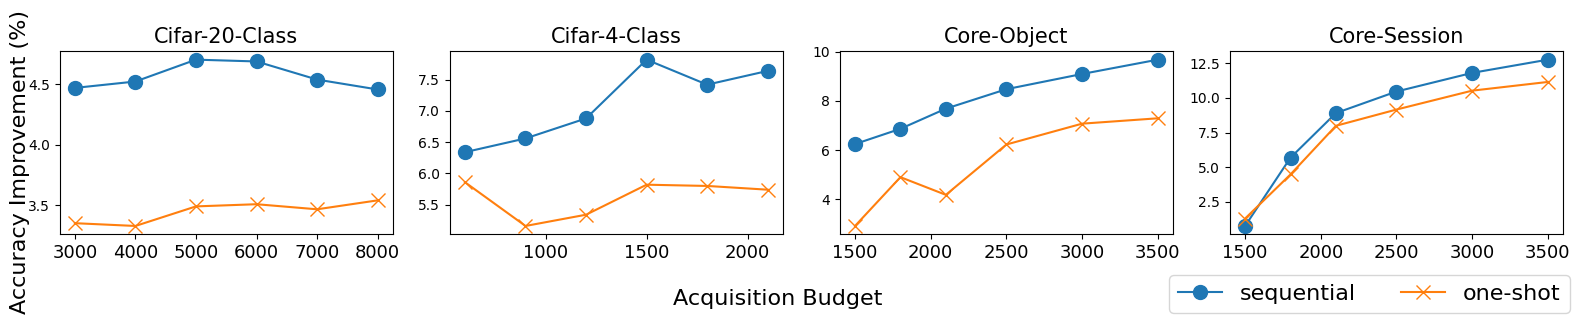

In [14]:
# (checked)
core_session= {
    'sequential': [0.764, 5.691, 8.909, 10.464, 11.809, 12.764], 
    'one-shot': [1.3, 4.482, 7.991, 9.164, 10.527, 11.155], 
}
core_object= {
    'sequential': [6.245, 6.864, 7.682, 8.473, 9.091, 9.673],  

    'one-shot': [2.918, 4.9, 4.182, 6.227, 7.073, 7.291], 
}

cifar = {
    'sequential': [6.34, 6.56, 6.88, 7.82, 7.42, 7.64],

    'one-shot':[5.86, 5.16, 5.34, 5.82, 5.8, 5.74],
}
cifar_init = {
    'sequential': [4.471, 4.524, 4.705, 4.69, 4.54, 4.458],

    'one-shot':[3.351, 3.328, 3.49, 3.508, 3.466, 3.54],
}

marker = {
    'one-shot': 'x',
    'sequential':  'o',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))

ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]
for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class',fontsize=15)
ax[0].tick_params(axis='x', labelsize=13)
# ax[0].legend(fontsize=11)

n_data = [600, 900, 1200, 1500, 1800, 2100]
for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class',fontsize=15)
# ax[1].legend(fontsize=11)
ax[1].tick_params(axis='x', labelsize=13)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object',fontsize=15)
# ax[2].legend(fontsize=11)
ax[2].tick_params(axis='x', labelsize=13)

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session',fontsize=15)
# ax[3].legend(fontsize=11)
ax[3].tick_params(axis='x', labelsize=13)

fig.legend(loc='lower right', fontsize=16, ncol=2)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Accuracy Improvement (%)', fontsize=16)
fig.tight_layout()
fig.show()

## error in new data

### Percent


In [ ]:
core_session= {
    'sequential': [86.283,83.722,80.583,76.727,72.256,67.443],
    'one-shot':  [81.667,78.433,74.233,70.28,66.6,63.21],
}

core_object= {
    'sequential': [72.467,68.567,64.425,59.34,55.978,52.971],
    'one-shot':  [60.083,56.567,53.375,51.233,49.272,47.219],
}

cifar = {
    'sequential': [74.4,73.289,71.342,69.8,67.85,66.224],
    'one-shot':  [71.333,69.867,68.85,67.373,66.25,64.833],
}

marker = {
    'one-shot': 'd',
    'sequential':  'o',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=11)
for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Object')
ax[1].legend(fontsize=11)

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=11)

# fig.legend(loc='lower right', fontsize=12)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Misclassified Acquired Data (%)', fontsize=11)
# fig.supylabel('the Number of Acquired Misclassification', fontsize=18)

fig.tight_layout()
fig.show()


### number

In [ ]:

core_session= {
    'one-shot':  [490.0, 705.9, 890.8, 1054.2, 1198.8, 1327.4],
    'sequential': [517.7, 753.5, 967.0, 1150.9, 1300.6, 1416.3],
}

core_object= {
    'one-shot':  [360.5, 509.1, 640.5, 768.5, 886.9, 991.6],
    'sequential': [434.8, 617.1, 773.1, 890.1, 1007.6, 1112.4],
}

cifar = {
    'one-shot':  [428.0, 628.8, 826.2, 1010.6, 1192.5, 1361.5],
    'sequential': [446.4, 659.6, 856.1, 1047.0, 1221.3, 1390.7],
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

width = 0.25  # the width of the bars
x = np.arange(6)
n_data = [600, 900, 1200, 1500, 1800, 2100]
pattern = {'sequential': '/', 'one-shot': ''}

multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
ax[0].legend(fontsize=11)
ax[0].set_title('Cifar-4-Class')

multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

multiplier = 0
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data)
ax[1].legend(fontsize=12)
ax[1].set_title('Core-Object')

for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('the Number of Acquired Misclassification', fontsize=13)

fig.tight_layout()
fig.show()

## precision in test

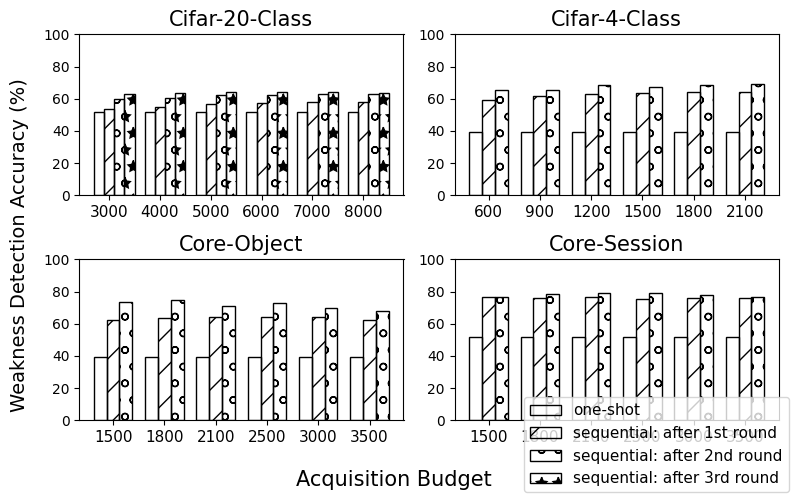

In [9]:

core_object= {
    'sequential' : {
        # 600: [59.30518258899458, 72.36862707713384],
        # 900: [62.9207892931758, 72.6199536891142],
        # 1200: [64.59829576970324, 76.01097360806827],
        # 1500: [62.616149596730544, 73.57724304662958],
        # 1800: [63.242760517559574, 74.5142343000663],
        # 2100: [64.17308232436741, 70.70455585810235]
        1500: [62.616149596730544, 73.57724304662958],
        1800: [63.242760517559574, 74.5142343000663],
        2100: [64.17308232436741, 70.70455585810235],
        2500: [64.0624374154465, 72.79307697841922],
        3000: [64.3307671613911, 69.84973820054458],
        3500: [62.55055428438699, 68.15052543755505],
    },
    'one-shot': 39.48,
}

cifar = {
    'sequential' : {
        600: [59.4909732680389, 65.20050747976079],
        900: [61.64197029813391, 65.17136722427739],
        1200: [62.82981756031745, 68.37730966659248],
        1500: [63.493245090158055, 67.56875239681843],
        1800: [63.93688887367216, 68.60007179680487],
        2100: [64.42150200319918, 69.23042209530044],
    },
    
    'one-shot': 51.817
}

cifar_init = {
    'sequential' : {
        3000: [53.48230477561184, 59.54875258089864, 62.97131708449321],
        4000: [54.91889893478392, 60.67348558464879, 63.57281094475368],
        5000: [56.71452389484212, 62.233662412216106, 64.21127431750463],
        6000: [57.34692649498625, 62.616164372858705, 64.22828970979315],
        7000: [57.8378196043091, 62.987082511348, 64.17144435891963],
        8000: [58.01356818016403, 62.876734106991876, 63.60884413889564],
    },
    'one-shot': 47.649
}
core_session= {
    'sequential' : {
        1500: [76.35100688916428, 76.77953952666124],
        1800: [75.82859466305774, 78.53809006604692],
        2100: [76.43229184667682, 79.01048182652026],
        2500: [75.29615216871801, 78.8869728924403],
        3000: [76.00502904151327, 77.86001629589369],
        3500: [75.76288107406434, 76.32225545397198],
    },
    'one-shot': 52.047,
}

labels = ['one-shot', 'sequential: after 1st round', 'sequential: after 2nd round']
pattern = {'one-shot': '', 'sequential: after 1st round': '/', 'sequential: after 2nd round': 'o', 'sequential: after 3rd round': '*'}

fig, ax = plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()

x = np.arange(6)

n_data = [3000, 4000, 5000, 6000, 7000, 8000]
width = 0.2  # the width of the bars

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': [], 'sequential: after 3rd round':[]}
multiplier = 0

for key, values in cifar_init['sequential'].items():
    vis['one-shot'].append(cifar['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
    vis['sequential: after 3rd round'].append(values[2])

for key, values in vis.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data, fontsize=11)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-20-Class', fontsize=15)

width = 0.25  # the width of the bars
vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0
n_data = [600, 900, 1200, 1500, 1800, 2100]

for key, values in cifar['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[1].set_xticks(x + width, n_data, fontsize=11)
ax[1].set_ylim(0, 100)
ax[1].set_title('Cifar-4-Class', fontsize=15)

width = 0.25  # the width of the bars
vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0
n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key, values in core_object['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[2].set_xticks(x + width, n_data, fontsize=11)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Object', fontsize=15)

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_session['sequential'].items():
    vis['one-shot'].append(core_session['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax[3].set_xticks(x + width, n_data, fontsize=11)
ax[3].set_ylim(0, 100)
ax[3].set_title('Core-Session', fontsize=15)

fig.legend(loc='lower right', fontsize=11)
fig.supxlabel('Acquisition Budget', fontsize=15)
fig.supylabel('Weakness Detection Accuracy (%)', fontsize=14)
fig.tight_layout()
fig.show()


## precision in market

In [ ]:
## Detector Accuracy
import numpy as np
core_object= {
    'sequential' : {
        600: [57.90142219369725, 64.61692266135476],
        900: [59.40950451859864, 57.54480188090666],
        1200: [61.24307219740617, 58.26575969104634],
        1500: [57.479210327867555, 51.26285281613283],
        1800: [56.81903364287373, 49.09135427113041],
        2100: [56.367729550786905, 41.374513174893764],
    },
    'one-shot': 39.77,
}

cifar = {
    'sequential' : {
        600: [66.77480275493255, 67.02400765502918],
        900: [66.472742613607, 64.46675053042563],
        1200: [67.27662000569765, 63.20298614823197],
        1500: [67.28629197417568, 62.78312364594218],
        1800: [66.89833623859104, 62.60659880949546],
        2100: [65.94892548892926, 61.6256599363521],
    },
    'one-shot': 47.44
}

core_session= {
    'sequential' : {
        600: [73.14890937621027, 71.54020993282477],
        900: [73.02644080192375, 67.84666382126747],
        1200: [72.49000297924972, 61.021441770833675],
        1500: [71.39087826232567, 50.899010858936464],
        1800: [69.15331451658065, 53.390512840198355],
        2100: [67.52177654878737, 54.567922882391805],
    },
    'one-shot': 51.564,
}

labels = ['one-shot', 'sequential: after 1st round', 'sequential: after 2nd round']
pattern = {'one-shot': '', 'sequential: after 1st round': '/', 'sequential: after 2nd round': 'o'}
n_data = [600, 900, 1200, 1500, 1800, 2100]


fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(6)

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in cifar['sequential'].items():
    vis['one-shot'].append(cifar['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])

for key, values in vis.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
# ax[0].legend(loc='upper left', ncols=3)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-4-Class')

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_object['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[1].set_xticks(x + width, n_data)
ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_session['sequential'].items():
    vis['one-shot'].append(core_session['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax[2].set_xticks(x + width, n_data)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=11)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Weakness Detection Accuracy(%)', fontsize=13)
fig.tight_layout()
fig.show()



## error during acquisition

In [ ]:
## Detector Accuracy
import numpy as np
core_object= {
    'sequential' : {
        600: [64.76666667,80.16666667], 
        900: [62.6,74.53333333],
        1200: [60.08333333,68.76666667],
        1500: [58.14666667,60.53333333],
        1800: [56.56666667,55.38888889],
        2100: [55.3047619,50.63809524]
    },
    'one-shot': {
        600: 60.083,
        900: 56.567,
        1200: 53.375,
        1500: 51.233,
        1800: 49.272,
        2100: 47.219,
    }
}

cifar = {
    'sequential' : {
        600: [73.36666667,75.43333333],
        900: [72.53333333,74.04444444],
        1200: [71.33333333,71.35],
        1500: [70.74666667,68.85333333],
        1800: [69.86666667,65.83333333],
        2100: [69.35238095,63.0952381]
    },
    'one-shot': {
        600: 71.333,
        900: 69.867,
        1200: 68.85,
        1500: 67.373,
        1800: 66.25,
        2100: 64.833
    }
}

core_session= {
    'sequential' : {
        600:[85.33333333,87.23333333],
        900:[83.46666667,83.97777778],
        1200:[81.66666667,79.5], 
        1500:[80.26666667,73.18666667],
        1800:[78.43333333,66.07777778],
        2100:[76.39047619,58.4952381]
    },
    'one-shot': {
        600: 81.667,
        900: 78.433,
        1200: 74.233,
        1500: 70.28,
        1800: 66.6,
        2100: 63.21
    }
}

labels = ['one-shot', 'sequential: after 1st round', 'sequential: after 2nd round']
pattern = {'one-shot': '', 'sequential: after 1st round': '/', 'sequential: after 2nd round': 'o'}
n_data = [600, 900, 1200, 1500, 1800, 2100]


fig, ax = plt.subplots(1,3, figsize=(12,3))
ax = ax.flatten()
width = 0.25  # the width of the bars
x = np.arange(6)

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in cifar['sequential'].items():
    vis['one-shot'].append(cifar['one-shot'][key])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])

for key, values in vis.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-4-Class')

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_object['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'][key])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key],label=key)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[1].set_xticks(x + width, n_data)
ax[1].set_ylim(0, 100)
ax[1].set_title('Core-Object')

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_session['sequential'].items():
    vis['one-shot'].append(core_session['one-shot'][key])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax[2].set_xticks(x + width, n_data)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Session')

fig.legend(loc="lower right", fontsize=13)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Misclassified Acquired Data(%)', fontsize=13)
fig.tight_layout()
fig.show()

## WEDE train

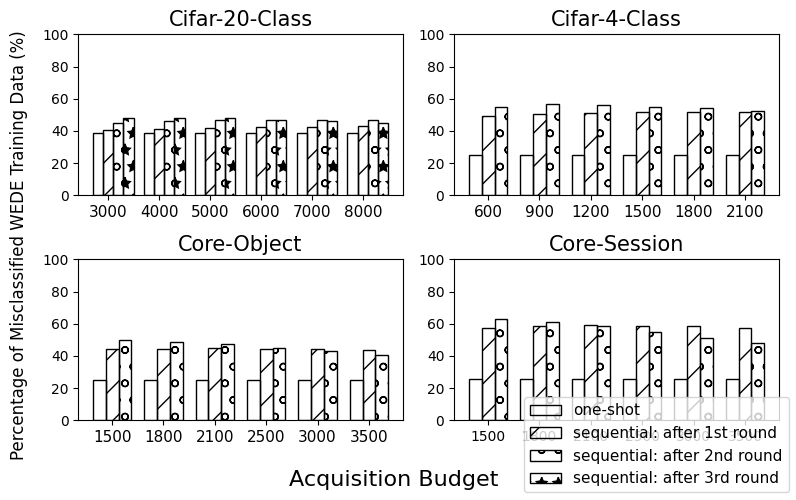

In [11]:
## Detector Accuracy
core_object= {
    'sequential' : {
        # 600: [39.0235294117647, 49.756521739130434],
        # 900:[ 41.910000000000004, 52.03448275862068], 
        # 1200: [43.29565217391304, 52.02857142857143],
        # 1500: [44.115384615384606, 50.1219512195122],
        # 1800: [44.58620689655173, 48.72340425531915],
        # 2100: [44.88125, 47.162264150943386]
        
        1500: [44.115384615384606, 50.1219512195122],
        1800: [44.58620689655173, 48.72340425531915],
        2100: [44.88125, 47.162264150943386],
        2500: [44.41666666666667, 44.9016393442623],
        3000: [44.19024390243903, 42.819718309859155],
        3500: [43.721739130434784, 40.78271604938271],
    },
    'one-shot': 25,
}

cifar = {
    'sequential' : {
        600: [48.975, 54.65454545454545],
        900: [50.578947368421055, 56.45],
        1200: [51.42727272727272, 56.12352941176471],
        1500: [51.67199999999999, 55.160000000000004],
        1800: [51.87142857142858, 54.256521739130434],
        2100: [51.87741935483871, 52.65],
    },
    'one-shot': 38.7
}

cifar_init = {
    'sequential' : {
        3000: [40.3, 44.9425, 48.038000000000004],
        4000: [41.21212121212121, 45.9172738962709, 48.30166666666667],
        5000: [41.92307692307692, 46.98237059264817, 47.96428571428571],
        6000: [42.352500000000006, 47.02, 46.99875000000001],
        7000: [42.70943918762982, 46.93219321932194, 46.10555555555557],
        8000: [43.146163737676815, 46.593016912165844, 45.033],
    },
    'one-shot': 32.93
}

core_session= {
    'sequential' : {
        1500: [57.13846153846155, 63.00975609756098],
        1800: [58.39310344827586, 61.336170212765964],
        2100: [58.93125, 58.758490566037736],
        2500: [58.83888888888888, 54.92131147540984],
        3000: [58.292682926829265, 51.242253521126756],
        3500: [57.173913043478265, 47.75308641975308],
    },
    'one-shot': 25.6,
}


labels = ['one-shot', 'sequential: after 1st round', 'sequential: after 2nd round']
pattern = {'one-shot': '', 'sequential: after 1st round': '/', 'sequential: after 2nd round': 'o', 'sequential: after 3rd round': '*'}

fig, ax = plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()

x = np.arange(6)

n_data = [3000, 4000, 5000, 6000, 7000, 8000]
width = 0.2  # the width of the bars

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': [], 'sequential: after 3rd round':[]}
multiplier = 0

for key, values in cifar_init['sequential'].items():
    vis['one-shot'].append(cifar['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
    vis['sequential: after 3rd round'].append(values[2])

for key, values in vis.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data, fontsize=11)
ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-20-Class', fontsize=15)

width = 0.25  # the width of the bars
vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0
n_data = [600, 900, 1200, 1500, 1800, 2100]

for key, values in cifar['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[1].set_xticks(x + width, n_data, fontsize=11)
ax[1].set_ylim(0, 100)
ax[1].set_title('Cifar-4-Class', fontsize=15)

width = 0.25  # the width of the bars
vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0
n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key, values in core_object['sequential'].items():
    vis['one-shot'].append(core_object['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax[2].set_xticks(x + width, n_data, fontsize=11)
ax[2].set_ylim(0, 100)
ax[2].set_title('Core-Object', fontsize=15)

vis = {'one-shot': [], 'sequential: after 1st round': [], 'sequential: after 2nd round': []}
multiplier = 0

for key, values in core_session['sequential'].items():
    vis['one-shot'].append(core_session['one-shot'])
    vis['sequential: after 1st round'].append(values[0])
    vis['sequential: after 2nd round'].append(values[1])
for key, values in vis.items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax[3].set_xticks(x + width, n_data, fontsize=11)
ax[3].set_ylim(0, 100)
ax[3].set_title('Core-Session', fontsize=15)

fig.legend(loc='lower right', fontsize=11)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Misclassified WEDE Training Data (%)', fontsize=12)
fig.tight_layout()
fig.show()


## recall

In [ ]:
core_session= {
    'sequential': [68.145,68.526,68.876,68.529,69.882,70.51],

    'one-shot':  np.repeat([71.243], 6)
}

core_object= {
    'sequential': [62.026,63.248,63.683,64.115,64.594,65.606],

    'one-shot': np.repeat([63.765], 6)
}

cifar = {
    'sequential': [59.426,60.041,60.19,60.29,61.488,62.071],

    'one-shot':  np.repeat([62.118], 6)
}

marker = {
    'one-shot': 'x',
    'sequential':  'o',
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[0].set_title('Cifar-4-Class')
ax[0].legend(fontsize=12)
for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[1].set_title('Core-Object')
ax[1].legend(fontsize=12)

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10, label = key)
ax[2].set_title('Core-Session')
ax[2].legend(fontsize=12)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Average Recall (%)', fontsize=13)
fig.tight_layout()
fig.show()

## error in test data

### weakness

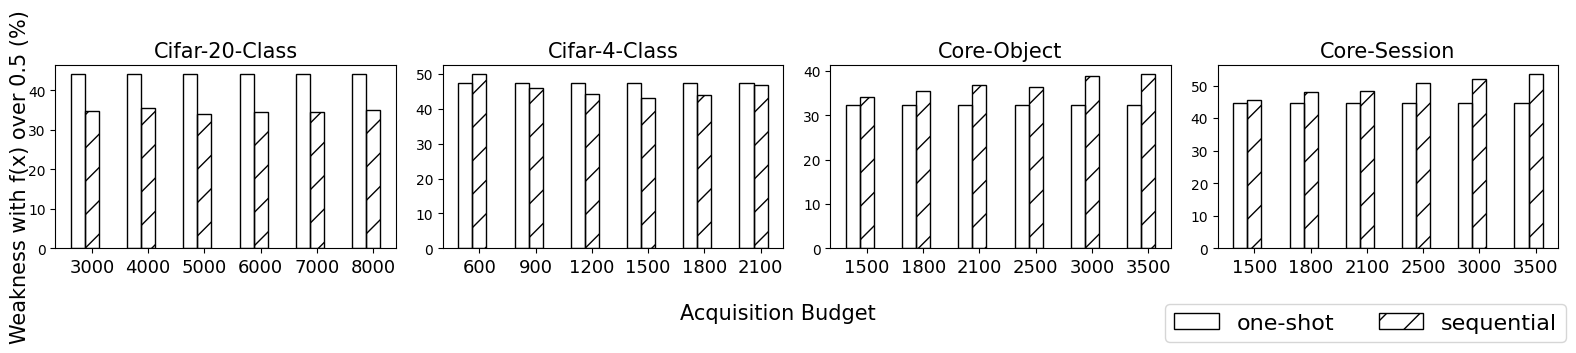

In [23]:

# weakness
core_session= {
    'one-shot': np.repeat([44.656], 6), 
    'sequential': [45.629, 48.026, 48.476, 50.633, 51.925, 53.513],
}

core_object= {
    'one-shot': np.repeat([32.285], 6), 
    'sequential': [34.083, 35.383, 36.698, 36.302, 38.858, 39.256]
}
cifar = {
    'one-shot': np.repeat([47.261], 6),
    'sequential': [49.923, 46.052, 44.25, 42.942, 43.962, 46.664]
}
cifar_init = {
    'one-shot': np.repeat([44.145], 6),
    'sequential': [34.856, 35.517, 34.087, 34.456, 34.579, 35.062]
}

labels = ['one-shot', 'sequential']
pattern = {'one-shot': '', 'sequential': '/'}
fig, ax = plt.subplots(1,4, figsize=(16,3))

x = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

width = 0.25  # the width of the bars
x = np.arange(6)

multiplier = 0
for key, values in cifar_init.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data, fontsize=13)
# ax[0].legend(loc='upper left', ncols=3)
# ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-20-Class', fontsize=15)

n_data = [600, 900, 1200, 1500, 1800, 2100]
width = 0.25  # the width of the bars
x = np.arange(6)

multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data, fontsize=13)
ax[1].set_title('Cifar-4-Class', fontsize=15)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data, fontsize=13)
# ax[1].set_ylim(0, 100)
ax[2].set_title('Core-Object', fontsize=15)

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[3].set_xticks(x + width, n_data, fontsize=13)
# ax[2].set_ylim(0, 100)
ax[3].set_title('Core-Session', fontsize=15)

fig.legend(loc='lower right', fontsize=16, ncol=2)
fig.supxlabel('Acquisition Budget', fontsize=15)
fig.supylabel('Weakness with f(x) over 0.5 (%)', fontsize=15)
fig.tight_layout()
fig.show()

### non-weakness

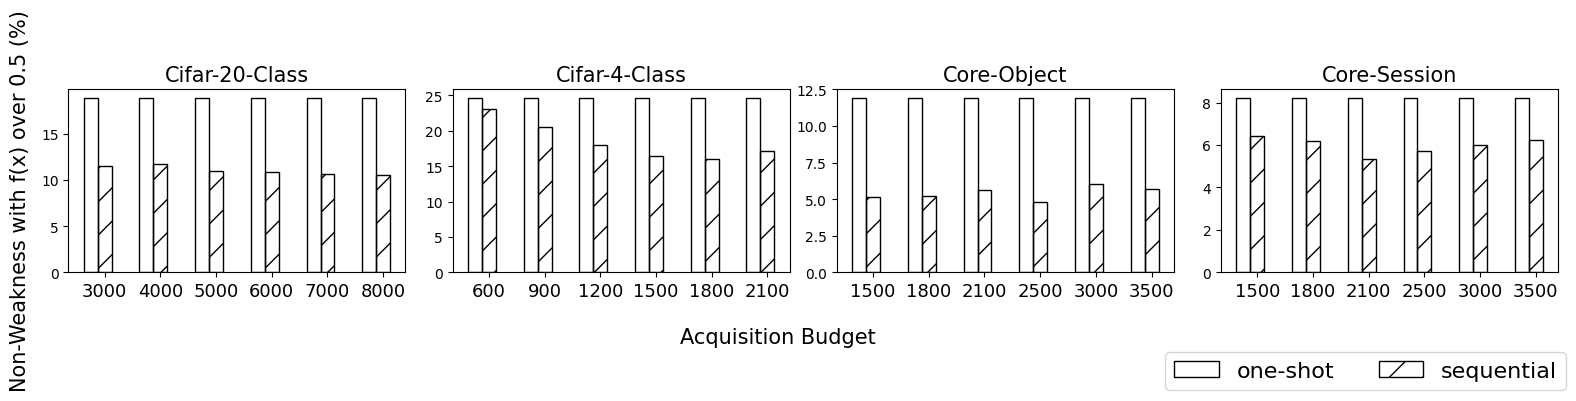

In [24]:
core_session= {
    'one-shot': np.repeat([8.21], 6), 
    'sequential': [6.435, 6.166, 5.354, 5.737, 5.982, 6.237]
}

core_object= {
    'one-shot': np.repeat([11.905], 6), 
    'sequential':[5.148, 5.224, 5.631, 4.802, 6.023, 5.676]
}

cifar = {
    'one-shot': np.repeat([24.62], 6),
    'sequential':[23.1, 20.523, 18.043, 16.45, 16.059, 17.113]
}

cifar_init = {
    'one-shot': np.repeat([18.871], 6),
    'sequential':[11.522, 11.731, 10.95, 10.827, 10.604, 10.577]
}

labels = ['one-shot', 'sequential']
pattern = {'one-shot': '', 'sequential': '/'}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data =[3000, 4000, 5000, 6000, 7000, 8000]

width = 0.25  # the width of the bars
x = np.arange(6)

multiplier = 0
for key, values in cifar_init.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xticks(x + width, n_data, fontsize=13)
# ax[0].legend(loc='upper left', ncols=3)
# ax[0].set_ylim(0, 100)
ax[0].set_title('Cifar-20-Class', fontsize=15)

n_data = [600, 900, 1200, 1500, 1800, 2100]

width = 0.25  # the width of the bars
x = np.arange(6)

multiplier = 0
for key, values in cifar.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, values, width, label=key,fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xticks(x + width, n_data, fontsize=13)
# ax[0].legend(loc='upper left', ncols=3)
# ax[0].set_ylim(0, 100)
ax[1].set_title('Cifar-4-Class', fontsize=15)

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

multiplier = 0
for key, values in core_object.items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_xticks(x + width, n_data, fontsize=13)
# ax[1].set_ylim(0, 100)
ax[2].set_title('Core-Object', fontsize=15)

multiplier = 0
for key, values in core_session.items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, values, width, fill=False, hatch=pattern[key])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[3].set_xticks(x + width, n_data, fontsize=13)
# ax[2].set_ylim(0, 100)
ax[3].set_title('Core-Session', fontsize=15)

fig.legend(loc='lower right', fontsize=16, ncol=2)
fig.supxlabel('Acquisition Budget', fontsize=15)
fig.supylabel('Non-Weakness with f(x) over 0.5 (%)', fontsize=15)
fig.tight_layout()
fig.show()

In [ ]:
core_object= [51.486, 51.156, 51.053, 50.048, 48.959, 47.212]
cifar = [67.116, 66.448, 66.364, 66.011, 65.446, 64.744]
core_session= [72.199, 71.433, 69.964, 68.305, 65.861, 63.201]
print(np.round(np.mean(core_object), decimals=3), np.round(np.mean(core_session), decimals=3), np.round(np.mean(cifar), decimals=3))
# n_data = [600, 900, 1200, 1500, 1800, 2100]

# fig, ax = plt.subplots(1,3, figsize=(12,3))

# n_data = [600, 900, 1200, 1500, 1800, 2100]
# ax = ax.flatten()

# ax[0].plot(n_data, cifar)
# ax[0].set_title('Cifar-4-Class')

# ax[1].plot(n_data, core_object)
# ax[1].set_title('Core-Object')

# ax[2].plot(n_data, core_session)
# ax[2].set_title('Core-Session')

# fig.supxlabel('Acquisition Budget', fontsize=16)
# fig.supylabel('Percentage of Misclassified Test Data for Mp(%)', fontsize=10)
# fig.tight_layout()
# fig.show()

In [ ]:
core_session= {
    'sequential + AE': [5.991, 7.427, 8.427, 8.0, 10.655, 11.091],
    'one-shot + WTA': [3.364, 5.918, 6.718, 8.5, 9.273, 9.664], #0.4
    'sequential + WTA':[-5.618, -1.445, 0.209, 1.464, 5.336, 7.745],
    # 'sequential + WTA':[-9.064, -5.309, -2.182, -1.536, 3.164, 5.673] #0.4
}

core_object= {
    'sequential + AE':  [5.427, 5.918, 6.673, 7.745, 7.964, 8.791],
    'one-shot + WTA': [1.973, 3.309, 4.664, 5.3, 5.673, 6.782], #0.4
    'sequential + WTA': [-7.918, -4.545, -1.591, 2.255, 3.591, 5.582],
    # 'sequential + WTA': [-11.464, -7.418, -3.755, 0.355, 2.227, 4.373] #0.4

}

cifar = {
    'sequential + AE':  [2.04, 2.9, 3.36, 3.74, 3.98, 4.22],
    'one-shot + WTA': [1.46, 2.24, 2.08, 2.22, 2.22, 2.5], #0.8
    'sequential + WTA': [-8.08, -6.82, -4.48, -4.88, -1.94, -1.0],
    # 'sequential + WTA': [-0.1, 0.6, 1.62, 1.56, 2.18, 2.26]#0.8
}

marker = {
    'one-shot + WTA':  'o',
    'sequential + WTA': 's',
    'sequential + AE':  '^',
}

fig, ax = plt.subplots(3, figsize=(6,9))
# fig, ax = plt.subplots(1,2, figsize=(10, 3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-4-Class')

for key,val in core_object.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Object')

for key,val in core_session.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=11)

fig.supxlabel('Acquisition Budget', fontsize=15)
fig.supylabel('Accuracy Improvement (%)', fontsize=18)
fig.tight_layout()
fig.show()

# dstr

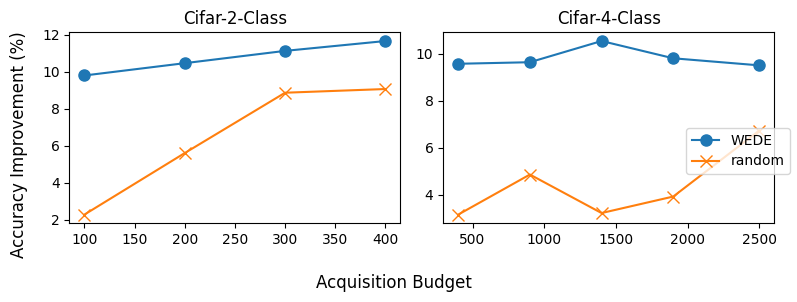

In [3]:
# intersection= {
#     'WEDE & unfiltered Data Pool': [5.367,10.667,11.1,12.3],
#     'random & unfiltered Data Pool':  [2.7,6.033,9.3,9.5],
#     'WEDE & filtered Data Pool': [7.8,11.767,12.767,13.933],
#     'random & filtered Data Pool':  [9.167,12.4,12.767,13.567],
# }

# intersection= {
#     'WEDE: one-shot': [14.433, 14.9, 16.067, 15.9, 16.2, 16.733],
#     'random': [8.9, 12.467, 15.233, 16.8, 17.867, 19.1]
# }

cifar_2= {
    'WEDE': [9.8,10.467,11.133,11.667],
    'random':  [2.267,5.6,8.867,9.067],
}
cifar_4= {
    'WEDE': [9.567, 9.633, 10.533, 9.8, 9.5],
    'random':  [3.167, 4.867,  3.233, 3.933, 6.733],
}
marker = {
    'WEDE': 'o',
    'random':  'x',
}
n_data = [100, 200, 300, 400]

fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax = ax.flatten()
for key,val in cifar_2.items():
    ax[0].plot(n_data, val, marker = marker[key], label = key, markersize=8)
ax[0].set_title('Cifar-2-Class')
n_data = [400, 900, 1400, 1900, 2500]

for key,val in cifar_4.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=8)
ax[1].set_title('Cifar-4-Class')

fig.legend(loc='center right', fontsize=10)
fig.supxlabel('Acquisition Budget', fontsize=12)
fig.supylabel('Accuracy Improvement (%)', fontsize=12)
fig.tight_layout()
fig.show()

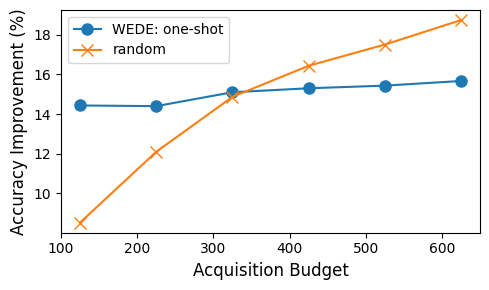

In [15]:
# intersection= {
#     'WEDE & unfiltered Data Pool': [5.367,10.667,11.1,12.3],
#     'random & unfiltered Data Pool':  [2.7,6.033,9.3,9.5],
#     'WEDE & filtered Data Pool': [7.8,11.767,12.767,13.933],
#     'random & filtered Data Pool':  [9.167,12.4,12.767,13.567],
# }

intersection= {
    'WEDE: one-shot': [14.433, 14.4, 15.1, 15.3, 15.433, 15.667], #
    'random': [8.533, 12.1, 14.867, 16.433, 17.5, 18.733], #
}
marker = {
    'WEDE: one-shot': 'o',
    'random':  'x',
}
n_data = [125, 225, 325, 425, 525, 625]
plt.figure(figsize=(5,3))

for key,val in intersection.items():
    plt.plot(n_data, val, marker = marker[key], markersize=8, label=key)
plt.xlabel('Acquisition Budget', fontsize=12)
plt.ylabel('Accuracy Improvement (%)', fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

# bias

## weakness

### baseline

In [ ]:

cifar_weak = {
    'one-shot':[0.15600000321865082, 0.18000000715255737, 0.19099999964237213, 0.19499999284744263, 0.20200000703334808, 0.20399999618530273],
    'sequential': [0.14800000190734863, 0.17900000512599945, 0.19099999964237213, 0.20399999618530273, 0.20800000429153442, 0.21299999952316284],
    'PGT':  [0.125, 0.15199999511241913, 0.1589999943971634, 0.17100000381469727, 0.17299999296665192, 0.18199999630451202],
    'random weakness':[0.1850000023841858, 0.19699999690055847, 0.19599999487400055, 0.20200000703334808, 0.20499999821186066, 0.2070000022649765],
    'source model': 0.1120000034570694
}
cifar_non_weak = {
    'one-shot':[0.6159999966621399, 0.5590000152587891, 0.5440000295639038, 0.5389999747276306, 0.5189999938011169, 0.5270000100135803],
    'sequential': [0.6290000081062317, 0.5720000267028809, 0.5410000085830688, 0.5230000019073486, 0.5260000228881836, 0.531000018119812],
    'PGT':  [0.5979999899864197, 0.5130000114440918, 0.4959999918937683, 0.4519999921321869, 0.4569999873638153, 0.453000009059906],
    'random weakness':[0.4860000014305115, 0.4569999873638153, 0.45399999618530273, 0.4410000145435333, 0.4339999854564667, 0.4300000071525574],
    'source model': 0.842
}

marker = {
    'one-shot': 's',
    'PGT': 'o',
    'random weakness': '^',
    'sequential': 'd',
    'source model': '|'
}

fig, ax = plt.subplots(1,2, figsize=(8,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar_weak.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[0].plot(n_data, val, marker = marker[key], markersize=10)
ax[0].set_ylabel('Average PGT of Weakness', fontsize=10)

for key,val in cifar_non_weak.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[1].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[1].set_ylabel('Average PGT of Non-Weakness', fontsize=10)

fig.legend(loc='upper right', fontsize=10)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.tight_layout()
fig.show()

In [ ]:
core_session= {
    'one-shot':[0.07999999821186066, 0.09099999815225601, 0.0989999994635582, 0.10599999874830246, 0.1080000028014183, 0.1120000034570694],
    'sequential': [0.07900000363588333, 0.0860000029206276, 0.0949999988079071, 0.10400000214576721, 0.10100000351667404, 0.11599999666213989],
    'PGT':  [0.0820000022649765, 0.08799999952316284, 0.09200000017881393, 0.0989999994635582, 0.1080000028014183, 0.10499999672174454],
    'random': [0.11699999868869781, 0.12200000137090683, 0.12399999797344208, 0.12600000202655792, 0.13099999725818634, 0.12800000607967377],
    'random weakness':[0.1120000034570694, 0.11500000208616257, 0.11299999803304672, 0.11500000208616257, 0.12200000137090683, 0.11800000071525574],
    'source model': 0.101
}

core_object= {
    'one-shot':[0.08399999886751175, 0.09700000286102295, 0.09200000017881393, 0.10300000011920929, 0.10000000149011612, 0.10499999672174454],
    'sequential': [0.0729999989271164, 0.08299999684095383, 0.09700000286102295, 0.10300000011920929, 0.0989999994635582, 0.10899999737739563],
    'PGT':  [0.052000001072883606, 0.06499999761581421, 0.06800000369548798, 0.06700000166893005, 0.0729999989271164, 0.08299999684095383],
    'random': [0.11500000208616257, 0.12300000339746475, 0.12200000137090683, 0.12300000339746475, 0.12600000202655792, 0.13099999725818634],
    'random weakness':[0.10000000149011612, 0.09300000220537186, 0.09799999743700027, 0.09000000357627869, 0.09600000083446503, 0.10000000149011612],
    'source model': 0.093
}

cifar = {
    'one-shot':[0.15600000321865082, 0.18000000715255737, 0.19099999964237213, 0.19499999284744263, 0.20200000703334808, 0.20399999618530273],
    'sequential': [0.14800000190734863, 0.17900000512599945, 0.19099999964237213, 0.20399999618530273, 0.20800000429153442, 0.21299999952316284],
    'PGT':  [0.125, 0.15199999511241913, 0.1589999943971634, 0.17100000381469727, 0.17299999296665192, 0.18199999630451202],
    'random': [0.16699999570846558, 0.18000000715255737, 0.1860000044107437, 0.18299999833106995, 0.1850000023841858, 0.1979999989271164],
    'random weakness':[0.1850000023841858, 0.19699999690055847, 0.19599999487400055, 0.20200000703334808, 0.20499999821186066, 0.2070000022649765],
    'source model': 0.1120000034570694
}
marker = {
    'one-shot': 's',
    'PGT': 'o',
    'random': 'x',
    'random weakness': '^',
    'sequential': 'd',
    'source model': '|'
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-4-Class')

for key,val in core_object.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Object')

for key,val in core_session.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=10)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Average PGT of Weakness', fontsize=11)
fig.tight_layout()
fig.show()

### threshold

In [ ]:
core_session ={
    '0.5': 0.123,
    '0.6': 0.122,
    '0.7': 0.105,
    'source': 0.101
} 
core_object ={
    '0.5': 0.11800000071525574,
    '0.6':  0.10300000011920929,
    '0.7':  0.0989999994635582,
    'source':  0.093
}
cifar ={
    '0.5': 0.1809999942779541,
    '0.6': 0.18000000715255737,
    '0.7': 0.1720000058412552,
    'source': 0.1120000034570694
}
pattern = {
    '0.5': '-',
    '0.6': '/',
    '0.7': 'o',
    'source': ''
}
x = np.arange(3)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1
    
plt.ylabel('Average PGT of Weakness', fontsize=12)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class'], fontsize=12)
plt.legend(fontsize=15)

plt.show()

## non-weakness

### baseline

In [ ]:
core_session= {
    'one-shot':[0.8220000267028809, 0.8399999737739563, 0.843999981880188, 0.8769999742507935, 0.8870000243186951, 0.9020000100135803],
    'sequential': [0.8259999752044678, 0.8289999961853027, 0.8479999899864197, 0.8460000157356262, 0.8889999985694885, 0.8949999809265137],
    'PGT':  [0.7200000286102295, 0.7739999890327454, 0.8190000057220459, 0.8360000252723694, 0.8489999771118164, 0.8740000128746033],
    'random': [0.890999972820282, 0.890999972820282, 0.9070000052452087, 0.9169999957084656, 0.921999990940094, 0.9259999990463257],
    'random weakness':[0.8009999990463257, 0.8320000171661377, 0.8550000190734863, 0.8700000047683716, 0.8759999871253967, 0.8790000081062317],
    'source model': 0.927
}

core_object= {
    'one-shot':[0.7960000038146973, 0.8259999752044678, 0.8579999804496765, 0.8629999756813049, 0.8820000290870667, 0.8899999856948853],
    'sequential': [0.7979999780654907, 0.8240000009536743, 0.8190000057220459, 0.8640000224113464, 0.8820000290870667, 0.890999972820282],
    'PGT':  [0.7559999823570251, 0.7210000157356262, 0.7730000019073486, 0.8410000205039978, 0.8510000109672546, 0.8640000224113464],
    'random': [0.8970000147819519, 0.9049999713897705, 0.906000018119812, 0.9139999747276306, 0.9200000166893005, 0.9259999990463257],
    'random weakness':[0.777999997138977, 0.8159999847412109, 0.8349999785423279, 0.859000027179718, 0.8669999837875366, 0.8700000047683716],
    'source model': 0.926
}

cifar = {
    'one-shot':[0.6159999966621399, 0.5590000152587891, 0.5440000295639038, 0.5389999747276306, 0.5189999938011169, 0.5270000100135803],
    'sequential': [0.6290000081062317, 0.5720000267028809, 0.5410000085830688, 0.5230000019073486, 0.5260000228881836, 0.531000018119812],
    'PGT':  [0.5979999899864197, 0.5130000114440918, 0.4959999918937683, 0.4519999921321869, 0.4569999873638153, 0.453000009059906],
    'random': [0.6850000023841858, 0.6660000085830688, 0.6499999761581421, 0.6679999828338623, 0.6480000019073486, 0.6209999918937683],
    'random weakness':[0.4860000014305115, 0.4569999873638153, 0.45399999618530273, 0.4410000145435333, 0.4339999854564667, 0.4300000071525574],
    'source model': 0.842
}
marker = {
    'one-shot': 's',
    'PGT': 'o',
    'random': 'x',
    'random weakness': '^',
    'sequential': 'd',
    'source model': '|'
}

fig, ax = plt.subplots(1,3, figsize=(12,3))

n_data = [600, 900, 1200, 1500, 1800, 2100]
ax = ax.flatten()

for key,val in cifar.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-4-Class')

for key,val in core_object.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Core-Object')

for key,val in core_session.items():
    if key == 'source model':
        val = np.repeat(val, 6)
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=10)

fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Average PGT of Non-Weakness', fontsize=11)
fig.tight_layout()
fig.show()

### threshold

In [ ]:
core_session = {0.5: 0.91, 0.6: 0.892, 0.7: 0.876, 'source': 0.927}
core_object = {0.5: 0.885, 0.6: 0.879, 0.7: 0.881, 'source': 0.926}
cifar ={0.5: 0.617, 0.6: 0.585, 0.7: 0.602, 'source': 0.842}
pattern = {
    0.5: '-',
    0.6: '/',
    0.7: 'o',
    'source': ''
}
x = np.arange(3)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

for key, value in core_session.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, [core_session[key], core_object[key], cifar[key]], width, label=key, fill=False, hatch=pattern[key])
    # plt.bar_label(rects, padding=3)
    multiplier += 1

plt.ylabel('Average PGT of Non-Weakness', fontsize=12)
plt.xticks(x+width, ['Core-Sesion', 'Core-Object', 'Cifar-4-Class'], fontsize=12)
plt.legend(fontsize=12)

plt.show()

# valid

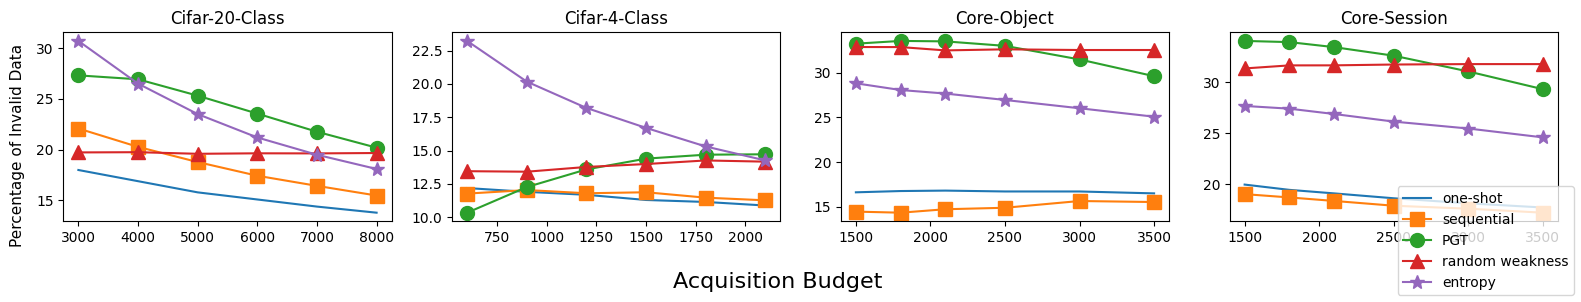

In [36]:
core_session= {
    'one-shot':[19.947, 19.428, 19.081, 18.6, 18.103, 17.694],
    'sequential': [19.007, 18.683, 18.338, 17.868, 17.577, 17.183],
    'PGT':   [34.073, 33.956, 33.462, 32.62, 31.07, 29.326],
    'random weakness':  [31.367, 31.667, 31.671, 31.752, 31.794, 31.794],
    'entropy': [27.68, 27.411, 26.886, 26.14, 25.46, 24.589],
}

core_object= {
    'one-shot':[16.613, 16.756, 16.805, 16.708, 16.707, 16.494],
    'sequential': [14.453, 14.333, 14.719, 14.884, 15.64, 15.526],
    'PGT':  [33.247, 33.556, 33.505, 33.004, 31.483, 29.609],
    'random weakness': [32.873, 32.867, 32.495, 32.616, 32.539, 32.539],
    'entropy': [28.813, 28.061, 27.667, 26.948, 26.02, 25.077],
}

cifar = {
    'one-shot':[12.183, 11.9, 11.675, 11.287, 11.139, 10.871],
    'sequential': [11.767, 12.033, 11.792, 11.867, 11.461, 11.262],
    'PGT':  [10.333, 12.256, 13.583, 14.393, 14.689, 14.719],
    'random weakness': [13.45, 13.411, 13.767, 13.987, 14.256, 14.166],
    'entropy':[23.233, 20.178, 18.2, 16.7, 15.306, 14.257],
}
cifar_init = {
    'one-shot':[18, 16.9, 15.8, 15.1, 14.4, 13.8],
    'sequential': [22.083, 20.275, 18.782, 17.435, 16.44, 15.489],
    'PGT':  [27.31, 26.925, 25.314, 23.548, 21.764, 20.195],
    'random weakness': [19.73, 19.752, 19.594, 19.642, 19.634, 19.671],
    'entropy': [30.7, 26.5, 23.5, 21.2, 19.5, 18.1],
}
marker = {
    'one-shot': '',
    'PGT': 'o',
    'entropy': '*',
    'random weakness': '^',
    'sequential': 's',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=10)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('Percentage of Invalid Data', fontsize=11)
fig.tight_layout()
fig.show()

In [1]:
import pickle as pkl 
import numpy as np

In [5]:
with open('../data/cifar_2class/0.pt', 'rb') as f:
    ds = pkl.load(f)
with open('../init_data/cifar_2class/0.pt', 'rb') as f:
    ds_0 = pkl.load(f)


In [3]:
ds_0.keys()

dict_keys(['val_shift', 'market', 'test_shift', 'train'])

In [6]:
np.array(ds['val_shift']) == np.array(ds_0['val_shift'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Weakness

In [ ]:
core_session= {
    'one-shot':[19.947, 19.428, 19.081, 18.6, 18.103, 17.694],
    'sequential': [19.007, 18.683, 18.338, 17.868, 17.577, 17.183],
    'PGT':   [34.073, 33.956, 33.462, 32.62, 31.07, 29.326],
    'random weakness':  [31.367, 31.667, 31.671, 31.752, 31.794, 31.794],
    'entrop': [27.68, 27.411, 26.886, 26.14, 25.46, 24.589],
}

core_object= {
    'one-shot':[16.613, 16.756, 16.805, 16.708, 16.707, 16.494],
    'sequential': [14.453, 14.333, 14.719, 14.884, 15.64, 15.526],
    'PGT':  [33.247, 33.556, 33.505, 33.004, 31.483, 29.609],
    'random weakness': [32.873, 32.867, 32.495, 32.616, 32.539, 32.539],
    'entrop': [28.813, 28.061, 27.667, 26.948, 26.02, 25.077],
}

cifar = {
    'one-shot':[12.2, 11.889, 11.717, 11.273, 11.144, 10.867],
    'sequential': [11.683, 12.033, 11.842, 11.587, 11.478, 11.252],
    'PGT':  [10.333, 12.256, 13.583, 14.393, 14.689, 14.719],
    'random weakness': [13.45, 13.411, 13.767, 13.987, 14.256, 14.166],
    'entrop':[23.233, 20.178, 18.2, 16.7, 15.306, 14.257],
}
cifar_init = {
    'one-shot':[18, 16.9, 15.8, 15.1, 14.4, 13.8],
    'sequential': [22.083, 20.275, 18.782, 17.435, 16.44, 15.489],
    'PGT':  [27.31, 26.925, 25.314, 23.548, 21.764, 20.195],
    'random weakness': [19.73, 19.752, 19.594, 19.642, 19.634, 19.671],
    'entrop': [30.7, 26.5, 23.5, 21.2, 19.5, 18.1],
}
marker = {
    'one-shot': 's',
    'PGT': 'o',
    'entrop': 'x',
    'random weakness': '^',
    'sequential': 'd',
}

fig, ax = plt.subplots(1,4, figsize=(16,3))
ax = ax.flatten()

n_data = [3000, 4000, 5000, 6000, 7000, 8000]

for key,val in cifar_init.items():
    ax[0].plot(n_data, val, marker = marker[key], markersize=10, label=key)
ax[0].set_title('Cifar-20-Class')

n_data = [600, 900, 1200, 1500, 1800, 2100]

for key,val in cifar.items():
    ax[1].plot(n_data, val, marker = marker[key], markersize=10)
ax[1].set_title('Cifar-4-Class')

n_data = [1500, 1800, 2100, 2500, 3000, 3500]

for key,val in core_object.items():
    ax[2].plot(n_data, val, marker = marker[key], markersize=10)
ax[2].set_title('Core-Object')

for key,val in core_session.items():
    ax[3].plot(n_data, val, marker = marker[key], markersize=10)
ax[3].set_title('Core-Session')

fig.legend(loc='lower right', fontsize=10)
fig.supxlabel('Acquisition Budget', fontsize=16)
fig.supylabel('the Number of Valid Data', fontsize=11)
fig.tight_layout()
fig.show()